# COGS108 Final Project

## Group Members: 
- Raymond Arevalo
- Abena Bonsu
- Megan Chang
- Lauren Liao

## Overview: 

In the world today, there are many pressing and relevant issues that effect vast and diverse populations of people. These issues are often times overshadowed by other problems that are more visibly apparent or noticeable to the common public. 

As a team, we wanted to tackle one of the many civic concerns that we found to be eclipsed and dominated by other more recognizeable issues. We hoped to shed light on one such dispute, and perhaps gain deeper insight into why, or even how it happens. To do this, we decided to focus on the issue of gentrification. This notebook analyzes factors and elements that are present in gentrified areas, and the findings can be used to both observe and gain understanding into an issue that effects millions of people nation-wide.

## Background Information: 

Before we can delve into our data and deeper analysis of such a complex social issue, we will first define what gentrification is.

**Gentrification:** 
> A term for the arrival of wealthier people in an existing urban district, a related increase in rents and property values, and changes in the district's character and culture. 

In general, this term is often used negatively, suggesting the displacement of poor communities by rich outsiders. In reality, the effects of gentrification are complex and oftentimes contradictory, and its real impact varies. Due to this, the true nature of gentrification is commonly disputed. There are varied perspectives towards the kinds of effects it is thought to have on the communities touched by the process. This stark contrast in opinion is particularly due to the fact that the true and lasting effects of gentrification are hard to both track and quantify.

**Catogorization of Gentrification:** 
> In today’s age, areas within the US are oftentimes sectioned off into 3 tracts: gentrified, non-gentrified, and ineligible to be gentrified. A tract is eligible to gentrify if its median household income and median home value are both in the bottom 40th percentile of all tracts within a metro area at the beginning of the decade.

Possible factors seemingly associated with gentrification include changes to crime, home value, housing income and racial diversity within an area. 


**Dispute and controversy:** 
> Though there are many opinions on this complex subject, in general they can be separated out into two camps. Those who are for gentrification, and those who are against it. 

In an attempt to make neighborhoods more “middle-class,” some believe that gentrification disproportionately targets underrepresented and low income families. Critics claim that gentrification (often forcefully) pushes these marginalized groups to less-privileged and oftentimes under-resourced areas, while catering to an influx of wealthy (ie white) populations. 

On the other hand, those in favor of gentrification believe that the process tends to decrease crime, while adding diversity to neighborhoods that may be predominantly one race or ethnicity. This topic is one that is definitely widely contested. It still continues to affect many communities in the US today.

Clearly, gentrification is an exremely multi-faceted and complex issue. In this notebook, we will be delving into factors that we feel are closely associated with gentrified areas. From this, we will draw conclusions into what be beleive the true nature of gentrification seems to suggest.

## Research Question:

How does gentrification contribute to changes in San Diego demographics? In particular, how do factors such as crime, home value, housing income and racial diversity change as a result of gentrification.

## Hypothesis:

We believe that overtime, the overall rate of crime in a gentrified neighborhood does decrease, however within the overall county overall crime rates will remain constant. If these findings are true, this will seem to suggest that the crime in gentrified areas are not truly eradicated like we are led to believe--but simply displaced or distributed to other non-gentrified neighborhoods.

### Approach: Testing our Hypothesis:

In order to thoroughly test our hypothesis, and answer our overall research question, we have designed a methodology that will help us both isolate and analyze gentrified areas throughout San Diego based on factors that we have created. We will define multiple indexes for gentrification, including our own. We will then see how our data analysis and findings support/reflect these different defintions. 
 
First we will start by actually identifying these gentrified neighborhoods. We will perform this classification by separating the populations present in San Diego county into different categories. These categories will include home value, housing income, and racial diversity within each city.

**Methodology for Data Collection:**

Once we have identified the gentrified neighborhoods present, we will then begin to look at the crime rates associated with these areas. We will look at the crime rates present both pre-and post-gentrification, and then compare this to the overall (city-wide) crime-rates within that same time frame. With these two data sets, we will determine whether or not a particular neighborhood’s decrease in crime directly correlated to a decrease in city-wide crime as well. These patterns of crime rate over time will be used to determine if gentrification favors the idea that crime in these areas are truly eliminated, or instead simply removed and uprooted to other areas within San Diego.
 
While conducting these analyses, the techniques implemented will include data gathering, data wrangling and data cleaning. In terms of finding data, we referenced government websites with open data sources and pulled the available information on housing, demographics, and crime rates. These data sets are commonly found in the form of CSV or JSON; however, for data contained in excel spreadsheets, we will convert the files into CSV files. After loading both CSV and JSON files into data frames by utilizing the functions given in pandas, we will sort data pertaining to different regions by zip code or neighborhood. 

**Methodology for Data Analysis:**

In terms of analysis, data visualization will allow us to observe relationships between different characteristics of gentrified neighborhoods. These datasets may also have outliers and other biases we need to identify and avoid. In order to examine that, we will identify the mean, median, and mode to determine the L2 errors (mean squared error) and L1 errors as well as resampling. By simply plotting the data and visualizing the data, we will be able to see certain trends and possible outliers. This methodology will allow us to sift through the large amounts of data present and isolate the points/factors that are relevant to our particular research question.

### Definitions of Gentrification to be Tested:

**_How we define through our dataset:_** <br>
We are defining it by comparing the affordability. If low income earners used to be able to afford a place and no longer be able to afford the place over time, with adjusted annual income within each year.

**_How we are comparing:_** <br>
We are comparing by benchmarking with one area that low income earners could relatively able to afford and one area that low income earners cannot afford. We are comparing the changes in crime within the benchmark areas against the gentrified areas we defined.

## 1. Individual Factors: Exploration and Analysis: 

In this section, the different factors that we believe contribute to gentrification will be explored and analyzed separately. These factors will later be combined to help paint a picture of what gentrified areas look like overall.

In [1]:
#imports
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
import h5py
import pprint as pp
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 1.1 Housing Income Estimates

* Dataset Name: Median Income Estimates (CA only)

* Data Source: DataQuick News

* Number of observations: 11,400 observations for San Diego

* Link: http://www.randstatestats.org/ca/stats/median-income-estimates-(ca-only).html 

This file contains information about median/overall income estimates calculated for different regions within San Diego County. In particular, it makes estimates for the San Diego-Carlsbad-San Marcos Metropolitan areas. This data also includes values for median family income, which can be used to compare with the aforementioned estimates.

This data set will be cleaned and used to cross reference both crime and housing prices within certain areas/zip codes in California. This data will provide us with information about the types of houses (and by extension, areas) available to certain demographic groups. We believe that the ability to buy houses/live in a particular area will be dependent on--or at least heavily correlated with--these income estimates.

**1.1.1 Cleaning Data:**

This section deals with parsing through the set, leaving only the relevant data points. This data includes income estimates that have been separated into three overarching categories: low income estimate bracket (80%), very low income estimate bracket (50%) and lowest income estimate bracket (30%). Median family income is also included.

These three sub categories are broken down further. Within each bracket, income estimates are separated out by how many persons are included within the group. The scale ranges from 1 - 8 persons. 

This data as a whole will be cleaned to calculate the averages within the sub groups. We do not necessarily care about the change within groups, but rather are interested in seeing the differences between groups.

In [3]:
# grabbing data from computer
filepath = '/Users/Agykbon/Desktop/Abena/Median-Income-Estimates.csv'
df = pd.read_csv(filepath)

# dropping null/irrelevant data
df = df.dropna()
df = df[['Category', '2007', '2008', '2009', '2010', '2011', '2012']]

**1.1.1.1 Create Data Frames for Each Income Category:**

Separate out the data into the distinct categories mentioned above and create data frames to hold each set. These sets will be used to compute the averages for each income bracket.

In [4]:
# low income category
lowIncome = df.drop(df.index[0:8]) 
lowIncome = lowIncome.drop(lowIncome.index[8:17])

# very low income category
veryLowIncome = df.tail(n=8) 

# lowest income category
lowestIncome = df.head(8)

# median family income
medianIncome = df.drop(df.index[0:16])
medianIncome = medianIncome.drop(medianIncome.index[1:9])

** 1.1.1.2 Visualizations:**

Before further extraction takes place, this section will analyze the data found within each category, and compare them to one another. This pre-visualization will help us to make sense of the raw data as it stands. It will later be manipulated to include only the averages of income estimates within the distinct groups.

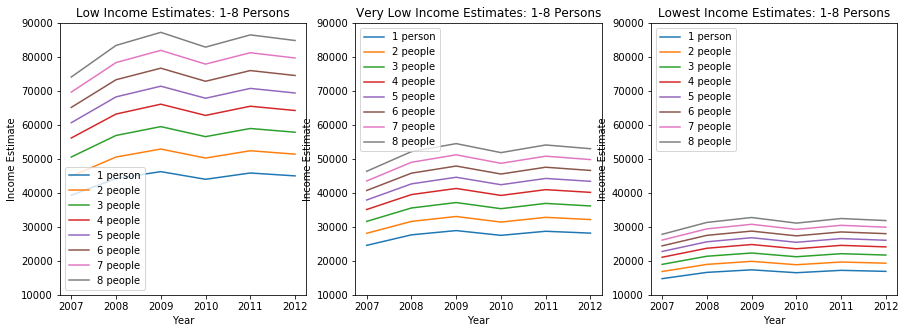

In [5]:
# Graph the "Low Income Estimates" bracket within group 
plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
lowIncomeGraph = convertData(lowIncome.drop('Category', 1))
labelAxis('Low Income Estimates: 1-8 Persons', 'Year', 'Income Estimate', 10000, 90000)
printLegend('lower left')

# Graph the "Very Low Income Estimates" bracket within group 
plt.subplot(1,3,2)
VlowIncomeGraph = convertData(veryLowIncome.drop('Category', 1))
labelAxis('Very Low Income Estimates: 1-8 Persons', 'Year', 'Income Estimate', 10000, 90000)
printLegend('upper left')

# Graph the "Lowest Income Estimates" bracket within group 
plt.subplot(1,3,3)
lowestIncomeGraph = convertData(lowestIncome.drop('Category', 1))
labelAxis('Lowest Income Estimates: 1-8 Persons', 'Year', 'Income Estimate', 10000, 90000)
printLegend('upper left')

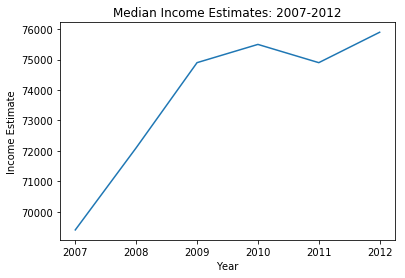

In [6]:
# Graph median income estimates
medianIncomeGraph = convertData(medianIncome.drop('Category', 1))
labelAxis('Median Income Estimates: 2007-2012', 'Year', 'Income Estimate', 0, 0)

** 1.1.1.3 Further Extraction: Averages Within Years**

In this section, the averages of income estimates are computed within the groups of a certain year. Our team doesn't necessarily need to keep the income estimate data separated out by # of people (1-8 persons). This section focuses on combining the relevant data so that we can produce an average for each subgroup within the overarching category.

In [7]:
# Get the averages for "Low Income Estimate" bracket 
val = makeAvgArray(lowIncome)
df_low = createDF('Low Income', val)

# Get the averages for "Very Low Income Estimate" bracket 
val2 = makeAvgArray(veryLowIncome)
df_vlow = createDF('Very Low Income', val2)

# Get the averages for "Lowest Income Estimate" bracket 
val3 = makeAvgArray(lowestIncome)
df_lowest = createDF('Lowest Income', val3)

# Merge all of the newly created data sets
df_all = df_low.merge(df_vlow, how='outer')
df_all = df_all.merge(df_lowest, how='outer')
df_all = df_all.merge(medianIncomeGraph, how='outer')
df_all = df_all.rename({0: 'Low Income', 1: 'Very Low Income', 
                        2: 'Lowest Income', 3: 'Median Income'})
df_all

2007     2008      2009      2010      2011     2012
Low Income       57556.25  64775.0  67756.25  64387.50  67150.00  65875.0
Very Low Income  35975.00  40487.5  42325.00  40250.00  42006.25  41175.0
Lowest Income    21581.25  24300.0  25418.75  24156.25  25181.25  24725.0
Median Income    69400.00  72100.0  74900.00  75500.00  74900.00  75900.0

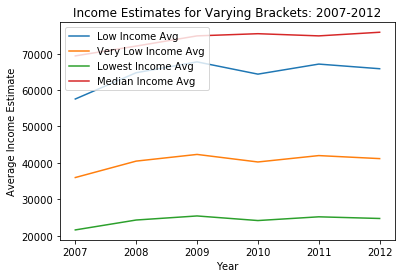

In [8]:
# Display visualization for all brackets across the years
df_income_all = df_all.copy(deep=True)
labelAxis('Income Estimates for Varying Brackets: 2007-2012', 'Year', 'Average Income Estimate', 0, 0)
plt.plot(df_income_all.T['Low Income'])
plt.plot(df_income_all.T['Very Low Income'])
plt.plot(df_income_all.T['Lowest Income'])
plt.plot(df_income_all.T['Median Income'])
plt.legend(['Low Income Avg', 'Very Low Income Avg', 
            'Lowest Income Avg', 'Median Income Avg'], loc='upper left')

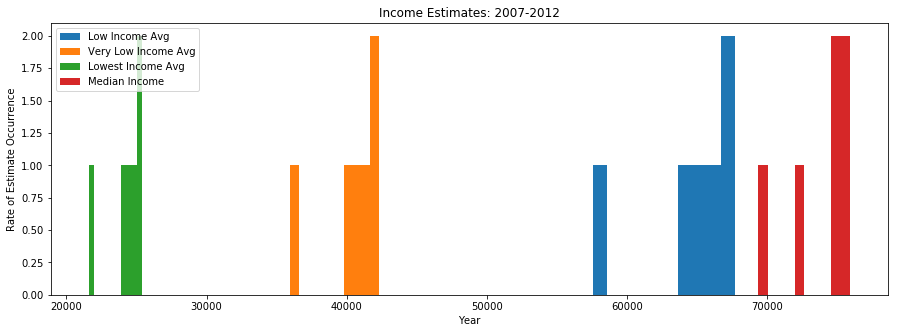

In [9]:
# Display visualization for all brackets across the years
fig = plt.figure(1,figsize=(15,5))
width = 0.12
ax = fig.add_subplot(111)

labelAxis('Income Estimates: 2007-2012', 'Year', 'Rate of Estimate Occurrence', 0, 0)
plt.hist(df_income_all.T['Low Income'])
plt.hist(df_income_all.T['Very Low Income'])
plt.hist(df_income_all.T['Lowest Income'])
plt.hist(df_income_all.T['Median Income'])
plt.legend(['Low Income Avg', 'Very Low Income Avg', 
            'Lowest Income Avg', 'Median Income'], loc='upper left')

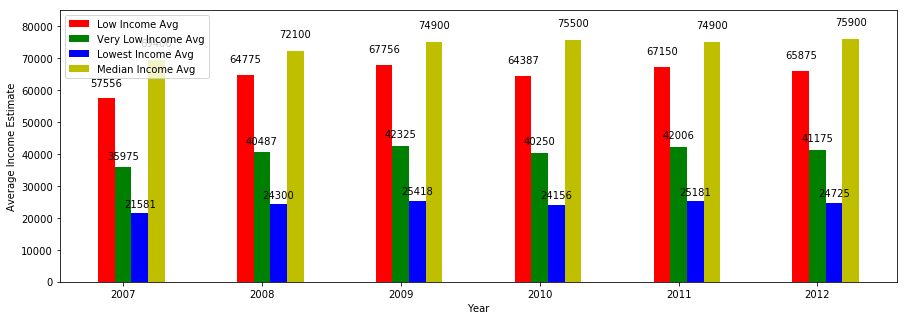

In [10]:
N = 6
fig = plt.figure(1,figsize=(15,5))
ind = np.arange(N)
width = 0.12
ax = fig.add_subplot(111)

# graph low, very low, lowest and median income estimate brackets 
makeGraph(df_all, 'Low Income', 'r', ind)
makeGraph(df_all, 'Very Low Income', 'g', ind+width)
makeGraph(df_all, 'Lowest Income', 'b', ind+width*2)
makeGraph(df_all, 'Median Income', 'y', ind+width*3)

# label graph
labelGraph()
ax.legend(('Low Income Avg', 'Very Low Income Avg', 'Lowest Income Avg', 'Median Income Avg'))

plt.figure(1, figsize=(50,40))
plt.show()

**1.1.2 General Trends/Analysis of Housing Income Estimates:**

In general, the data from this sets seems to suggest two overarching ideas.

Idea 1. *Between* groups for each bracket (low, very low, lowest, median(, there is quite a bit of difference in estimated income. 

Average Differences Between Brackets:

> *Median Income vs. Low Income:* On average, the Median Income Bracket earned about ~9.6% more income than the Low Income Bracket.

> *Median Income vs. Very Low Income:* On average, the Median Income Bracket earned about ~43.5% more income than the Very Low Income Bracket.

> *Median Income vs. Lowest Income:* On average, the Median Income Bracket earned about ~66.1% more income than the Lowest Income Bracket.

> *Low Income vs. Very Low Income:* On average, the Low Income Bracket earned about ~37.5% more income than the Very Low Income Bracket.

> *Low Income vs. Lowest Income:* On average, the Low Income Bracket earned about ~62.3% more income than the Lowest Income Bracket.

> *Very Low Income vs. Lowest Income:* On average, the Very Low Income Bracket earned about ~40.0% more income than the Lowest Income Bracket.

These differences in income are quite steep, and it is clear that these differences would heavily translate to the types of areas/types of houses a particular group would be capable of affording. This data will be later analyzed in terms of both housing prices and demographics.

Idea 2. Though the estimates for each bracket of income (low, very low, lowest, median) differ by a great deal **between** groups, the overall fluctuation of each bracket over the years **within groups** has little fluctuation when compared to the others. 

*Low Income:*
> *Highest estimate:* $67756.25 (2009) 

> *Lowest estimate:* $57556.25 (2007)	

> *Difference:* $10,200.00

*Very Low Income:*
> *Highest estimate:* $42325.00 (2009)

> *Lowest estimate:* $35975.00 (2007)	

> *Difference:* $6,350.00

*Lowest Income:*
> *Highest estimate:* $25418.75 (2009)

> *Lowest estimate:* $21581.25 (2007)	

> *Difference:* $3,837.50

*Median Income:*
> *Highest estimate:* $75900.0 (2012)

> *Lowest estimate:* $69400.00 (2007)	

> *Difference:* $6,500.00


The bracket that fluctuated the most was the low income bracket (around 10,000 dollars), but the rest stayed between around a 4000-6,500 dollar fluctuation. The lack of fluctuation throughout the years tells us that the different sub groups are staying (for the most part) constant. One group is not necessarily growing (economically) more rapidly than another. 

### 1.2 Housing Prices

- Dataset Name: Housing Prices and Transactions (CA only)
- Data Source: DataQuick News
- Number of observations: 11,400 for San Diego
- Link: http://www.randstatestats.org/ca/stats/housing-prices-and-transactions-(ca-only).html 


This dataset contains the number of sales, average sales price, average price per square foot, and average square footage of all homes, condos/townhouses, and single-family homes each month, also the average per year in California from 2002-2012.

This data set will be cleaned and used to cross reference both crime and income within certain areas/zip codes in California. This data will targets answering where are the affordable housing. 

**1.2.1 Cleaning Data:**

For housing data, we have cleaned and created a two-dimensional matrix where the former index refers to the corresponding year, and latter index refers to the zipcode

In [3]:
#load data from h5 
h5_file = '../COGS108-Gentrification/cogs108.h5'
#reading data
with h5py.File(h5_file, 'r') as h5:
    dset = h5['hp']
    #_ = plt.plot(dset[:][:])
    hp = []
    hp.append(dset[:][:])

**1.2.2 Analysis of Housing Prices:**

We conducted the analysis through each visualization.

To visualize the data, we plotted housing prices change over time with line graph showing changes in each zipcode. <br>
We also plotted the prices by zipcode where the colors refer to each year.

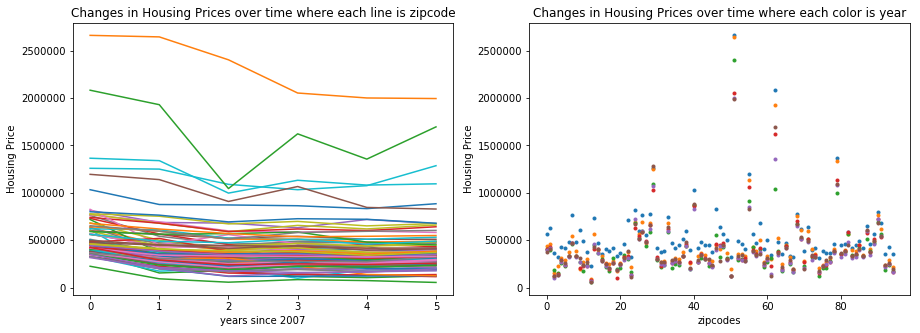

In [12]:
housing_price_changes()

Overall this data indicated there are a few areas where it is extremely expensive to live in. 


Since for multiple zipcodes, they refer to one area.<br>
To get a better understanding of the housing prices within the area, we want to look at the changes separated by the zipcode  over time.

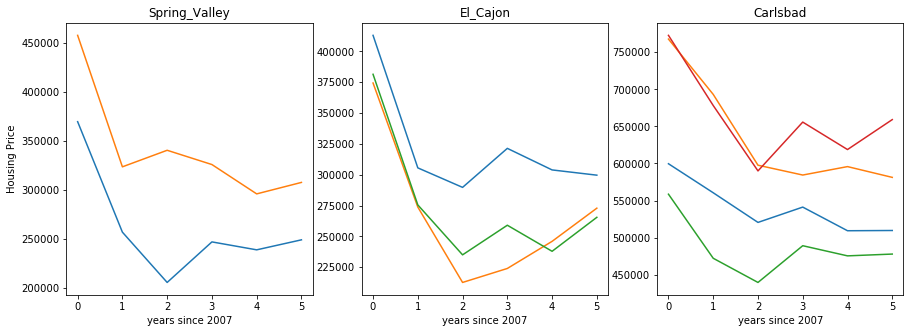

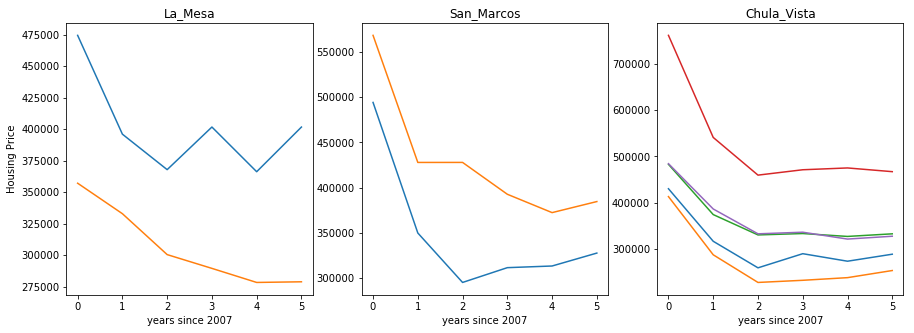

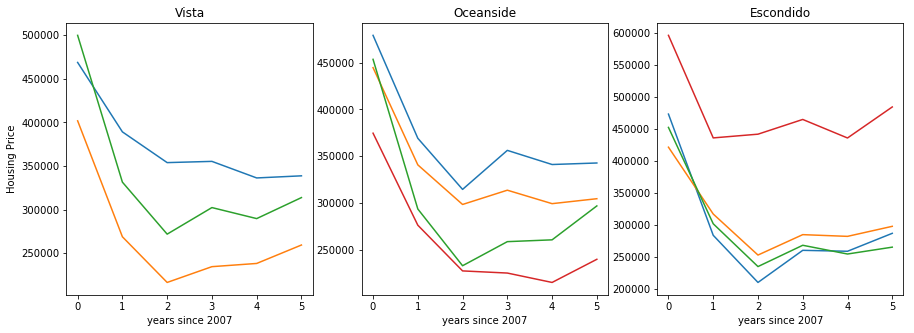

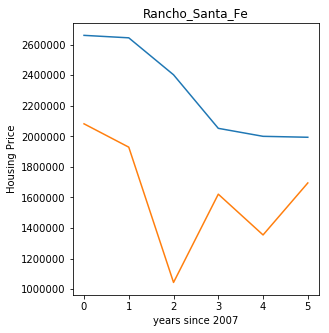

In [27]:
multi_zipcode_in_area()

There are significantly more expensive zipcodes than others within one area. <br>
The data also shows the housing market crash during 2008 and its affect on the housing market over the following years.<br> Overall, it appears even though the housing prices gradually increased, it never reached back to its previous state as 2007.

To examine closer of the changes, between 2007 and 2012, we visualize the price changes between these two years to examine how it changed.

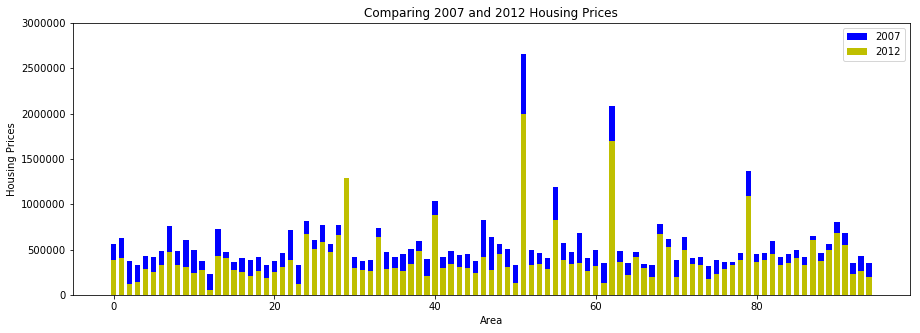

In [14]:
comparing_housing_prices()

It appears only one area is more expensive in 2012 than 2007, which shows almost none of the areas returned to the 2007 status 6 years ago.

We want to look at the number of homes at each price to understand the dataset better.

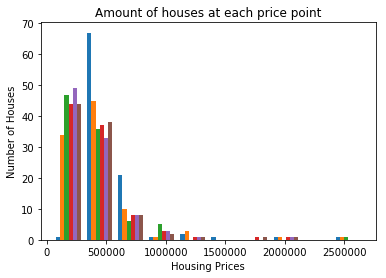

In [16]:
amount_of_houses()

It appears most homes are below 500 thousand dollars, and a few homes above. By combining the data from housing income, we can examine if people can afford it and find out which places they can afford.

### 1.3 Demographics

- Dataset Name: 2012 San Diego Demographics - County Population
- Data Source: Live Well San Diego
- Number of observations: 3,143,429 for San Diego
- Link: https://data.livewellsd.org/Demographic-Profiles/2012-San-Diego-Demographics-County-Population/byka-f6k4/data


This dataset contains region, area (city), total 2012 population, populations for age group, genders, and races/ethnicities.

This data set will be cleaned and used to cross reference both housing prices and income for the city of San Diego


**1.3.1 Cleaning Data:**

For demographics data, we have cleaned and created a two-dimensional matrix where the former index refers to the corresponding city, and latter index refers to the demographic count

In [4]:
#load data from h5 
h5_file = '../COGS108-Gentrification/cogs108.h5'
#reading data
with h5py.File(h5_file, 'r') as h5:
    dset = h5['county_demographics']
    dem = dset[:][:]

**1.3.2 Analysis of Demographics:**

We conducted the analysis through each visualization.

To visualize the data, we plotted the demographic counts in each region with bar graphs showing the differences between the races/ethnicities

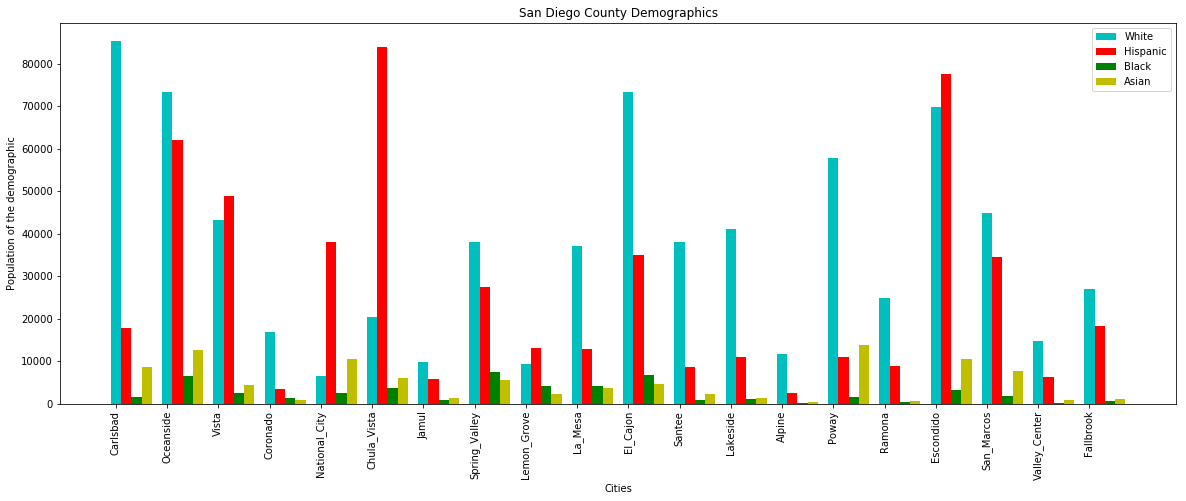

In [6]:
demographicsCount()

Overall this data indicates that the majority in most cities throughout San Diego County are white people. As a result, we could assume that these areas can't be gentrified. <br> <br> <br>

To get a closer look, we visualize the differences in demographics by dot plotting.



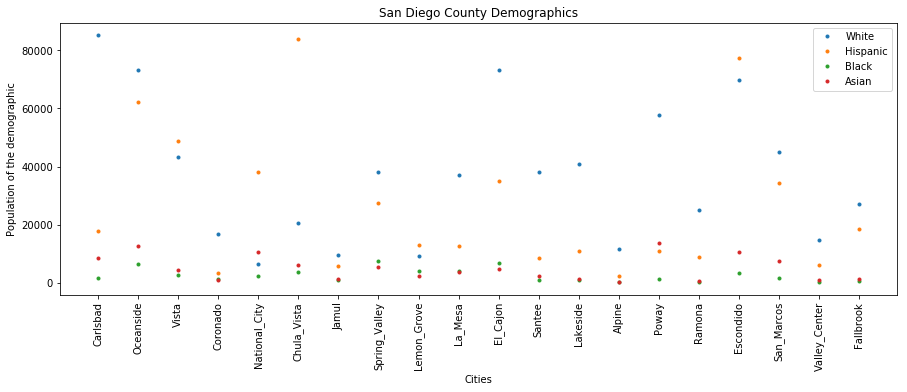

In [8]:
demCloser()


Overall this data shows that there is a big gap between the populations of the different races/ethnicities. With White and Hispanic being separaated from Black and Asian.

<br> <br> <br>

### 1.4 Crime Data: San Diego City
 
- Dataset Name: San Diego Region Crime Incidents 2007-2013 (incidents-100k.csv)
- Data Source: San Diego Regional Library
- Number of Observations: 750,000 for San Diego County
- Link: http://data.sandiegodata.org/dataset/clarinova_com-crime-incidents-casnd-7ba4-extract

This dataset contains each incident of crime from 2007 - 2012 within the different cities in the greater San Diego County. The data set is used to plot crime counts in different neighborhoods within the City of San Diego.
 


**1.4.1 Cleaning Data:**

Data was extracted from this dataset based on year, neighborhood, and crime committed. Each incident was then grouped by year and neighborhood to tabulate the crimes committed per year for each neighborhood. Then zip codes were paired with  corresponding neighborhood names and added to the dataset.  

Below, we are reading in the cleaned data for San Diego City into a two-dimensional matrix where the former index refers to the corresponding year, and latter index refers to crime count for each individual zipcode. A three-dimensional matrix is also constructed where the first index is year, the second index is crime count per zipcode, and the corresponding zipcode.
The cleaned data for San Diego county is uploaded in a similar way.

In [4]:
#load data from h5 
h5_file = '../Pr_057-master/cogs108.h5'
#reading data of San Diego City, which includes year and crime counts
with h5py.File(h5_file, 'r') as h5:
    dset = h5['crime_rate']
    crimebread = []
    crimebread = (dset[:][:])

#reading data of San Diego City Data, which includes year, crime counts, and zip code
with h5py.File(h5_file, 'r') as h5:
    dset = h5['crime_rate_3D']
    crimebread3D = []
    crimebread3D = (dset[:][:])
    
#reading data of San Diego County, which includes year and crime counts
with h5py.File(h5_file, 'r') as h5:
    dset = h5['SD_crime_rate']
    SD_crimebread = []
    SD_crimebread = (dset[:][:])

#reading data of San Diego County, which includes year, crime counts, and zip code
with h5py.File(h5_file, 'r') as h5:
    dset = h5['SD_crime_rate_3D']
    SD_crimebread3D = []
    SD_crimebread3D = (dset[:][:])
    
# grab data for San Diego County from file
crime_bread = []
h5_file = 'cogs108.h5'
with h5py.File(h5_file, 'r') as h5:
    dset = h5['crime_rate_3D']
    crime_bread = dset[:][:]
    

**1.4.2 Analysis of Crime Data:**

First, we examined the crime trends within the City of San Diego. We extracted the neighborhoods within the City of San Diego and through the visualizations, we found a drastic decline in crime over the years. Further analysis was performed on San Diego County and we found a less consistent trend in decline of crime rates.  

**1.4.2.1 Trends between San Diego City and San Diego County:**
The gradual decrease in crime apprears to be a general trend for most of the neighborhoods in San Diego city. However, when graphing the crime for the entire county of San Diego, there are significantly more fluctations in crime counts.

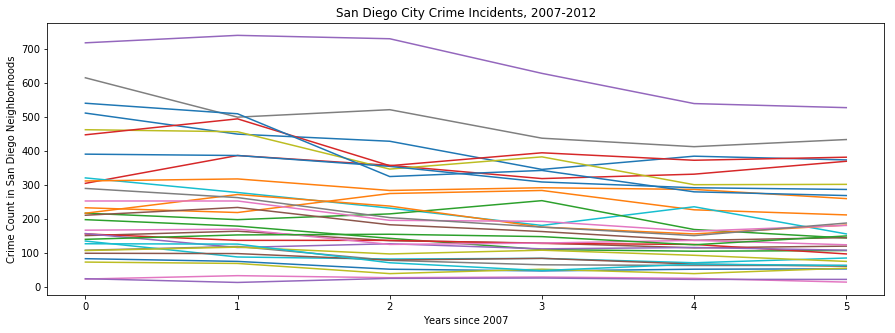

In [9]:
# Graph number of crime incidents for all neighborhoods in the City of San Diego
SD_city_crime_overtime()

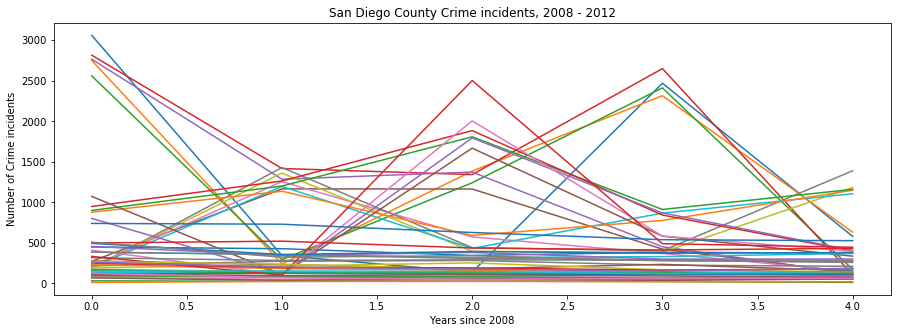

In [10]:
# Graph number of crime incidents for all neighborhoods in the City of San Diego and cities in San Diego County
SD_County_Crime_Overtime()

The graph below shows the number of crime counts in San Diego City for each zipcode where each color represents a different year. The crime counts for each year remain relatively similar.

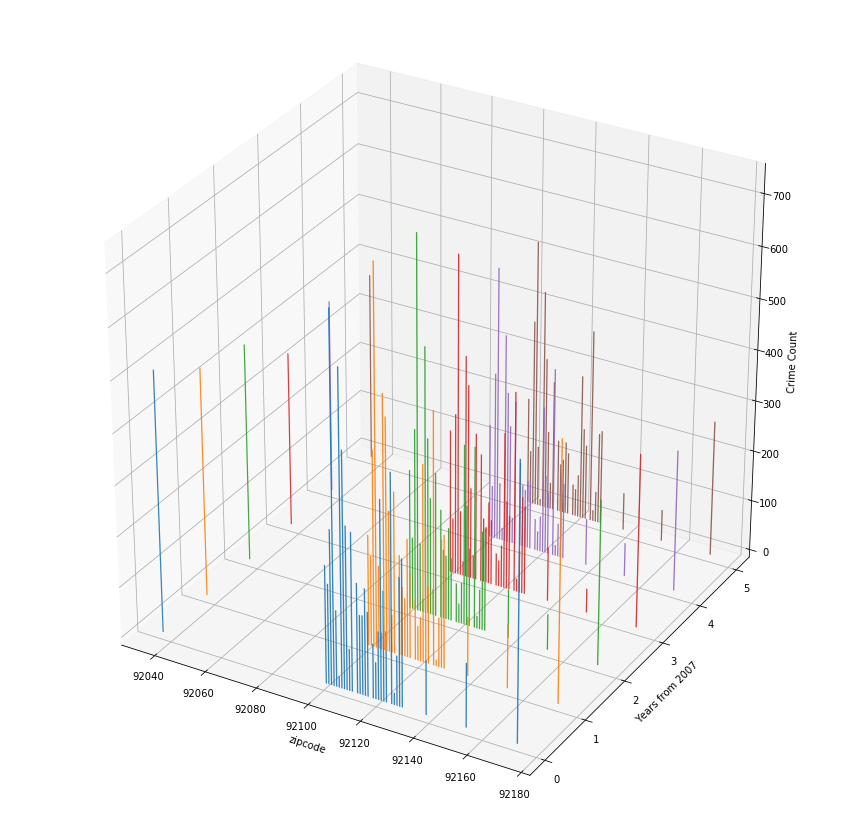

In [32]:
SD_city_crime_3D()

Below shows the number of crime counts in San Diego County for each zipcode where each color represents a different year. There is a drastic drop in crime between 2008 and 2009 as well as a drop between 2011 and 2012.

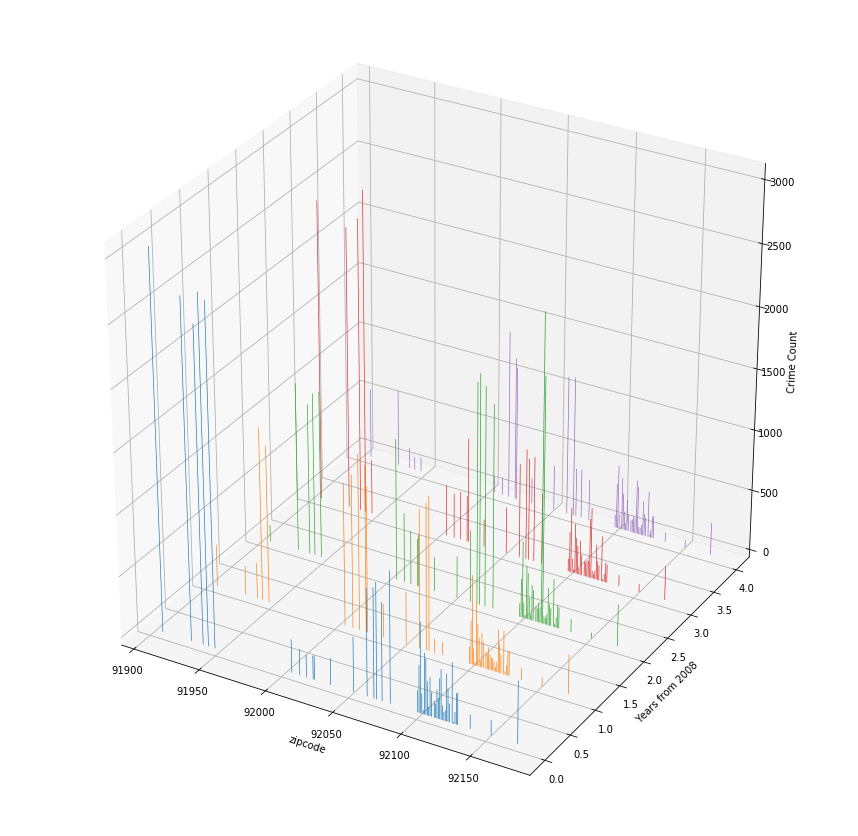

In [35]:
SD_county_crime_3D()

### 1.5 Crime Data: San Diego County excluding city
- Dataset Name: 2012 San Diego Demographics - County Population
- Data Source: San Diego Regional Data Library
- Number of observations: 750,000 for San Diego
- Link: http://data.sandiegodata.org/dataset/clarinova_com-crime-incidents-casnd-7ba4-extract/resource/34e63e92-7172-4a7e-863b-3479dc2a0b1e


All of the incidents, about 750K records, for years 2008, 2009, 2010, 2011 and 2012. This set has less than 1M records so it can be loaded into Tableau.

This data set will be cleaned and compared to "1.4 Crime Data: San Diego City" to find the differences between the two data sets


**1.5.1 Cleaning Data:**

For the San Diego crime data, we have cleaned and created a two-dimension matrix where the former index refers to the corresponding city (excluding the city of San Diego), and the latter index refers to the crime count.


In [9]:
#load data from h5 
h5_file = '../COGS108-Gentrification/cogs108.h5'
#reading data
with h5py.File(h5_file, 'r') as h5:
    dset = h5['county_crime_avg_5y']
    sdcec = dset[:][:]

with h5py.File(h5_file, 'r') as h5:
    dset = h5['county_crime_avg_5y_rates']
    
    sdcecr = dset[:][:]

**1.5.2 Analysis of Crime Incidents:**


We conducted the analysis through each visualization. 

The gradual decrease in crime apprears to be a general trend for most of the neighborhoods in San Diego city. However, when graphing the crime for the entire county of San Diego, there are significantly more fluctations in crime counts.


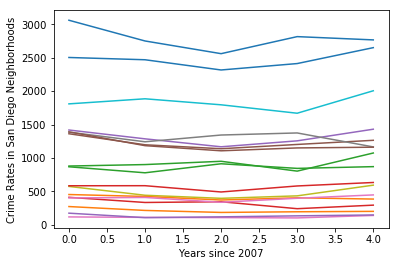

In [12]:
countycrimeRates()

The graph below shows the number of crime counts in San Diego County (excluding the city of San Diego) for each zipcode where each color represents a different year. The crime counts for each year remain relatively similar.

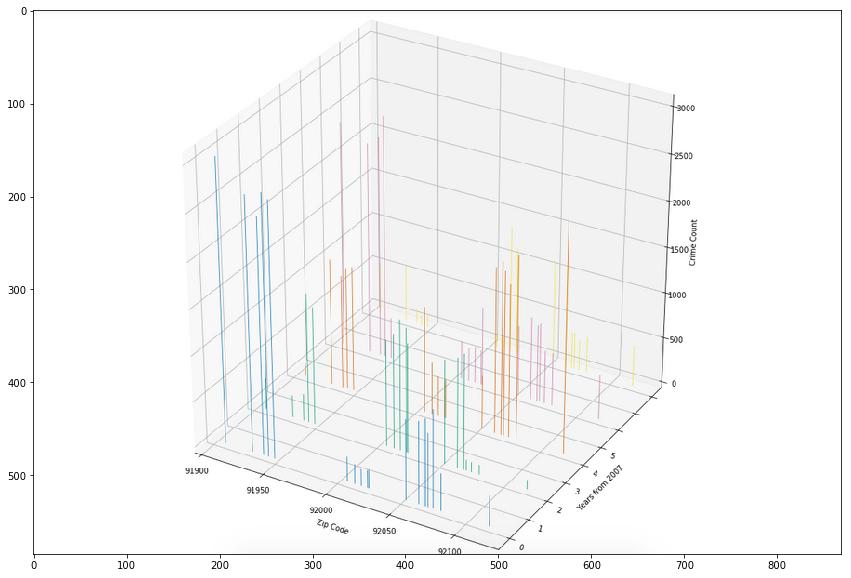

In [10]:
countycrimeRates3d()

### 1.6 FBI Crime Rates
- Dataset Name: CALIFORNIA Offenses Known to Law Enforcement by City 2007-2012
- Data Source: Federal Bureau of Investigation
- Number of observations: a lot
- Links
    : 2007 https://ucr.fbi.gov/crime-in-the-u.s/
    : 2008 https://ucr.fbi.gov/crime-in-the-u.s/2008 
    : 2009 https://ucr.fbi.gov/crime-in-the-u.s/2009
    : 2010 https://ucr.fbi.gov/crime-in-the-u.s/2010/crime-in-the-u.s.-2010/tables/table-8/10tbl08ca.xls 
    : 2011 https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/tables/table8statecuts/table_8_offenses_known_to_law_enforcement_california_by_city_2011.xls 
    : 2012 https://ucr.fbi.gov/crime-in-the-u.s/2012/crime-in-the-u.s.-2012/tables/8tabledatadecpdf/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_by_california_by_city_2012.xls 



These dataset contains the cities, population, and crimes categorized by violent crime, murder and nonnegligent manslaughter, forcible rape, robbery, aggravated assault, property crime, burglary, larceny-theft, motor vehicle theft, and arson in California from 2007-2012.

**1.6.1 Cleaning Data:**
For the San Diego crime data, we have cleaned and created a two-dimension matrix where the former index refers to the crime rate (crime count / population), and the latter index refers to the years.



In [7]:
h5_file = '../COGS108-Gentrification/cogs108.h5'
#reading data
with h5py.File(h5_file, 'r') as h5:
    dset = h5['fbi_crime_rates_new']
    fbicr = dset[:][:]

**1.6.2 Analysis of Housing Prices:**

We conducted the analysis through each visualization.

**1.6.2.1 Crime Rates in San Diego County According to FBI Data:** Crime gradually decreased in most of the cities in San Diego County. While one city had fluctations in crime rates. This increase in crime occurred in Del Mar.


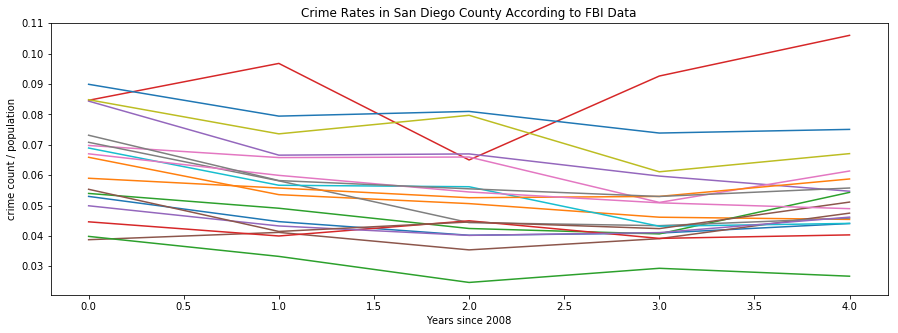

In [8]:
fbirates()

**1.6.2.2 Crime Rates Averages in San Diego County According to FBI Data:** This graph changes in crime rates throughout 2008-2012. As stated above, crime was shown to decrease on average


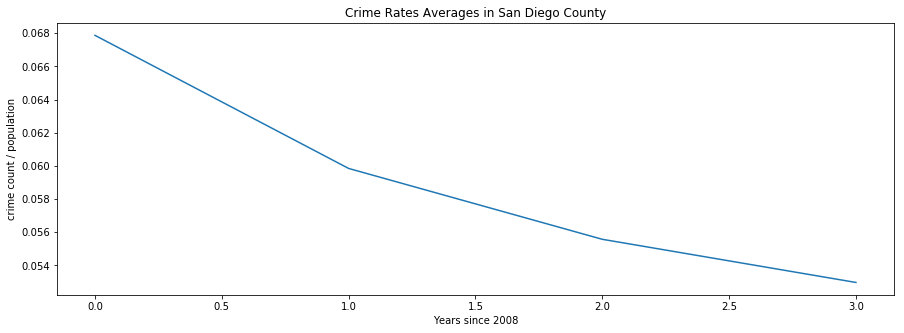

In [9]:
fbiavg()

**1.6.2.3 Crime Rates and Average crime rate in San Diego County According to FBI Data:** This graph tracks the changes of the crime rates for each city in San Diego County and compares it to the average crime rate for the county from 2008 - 2012

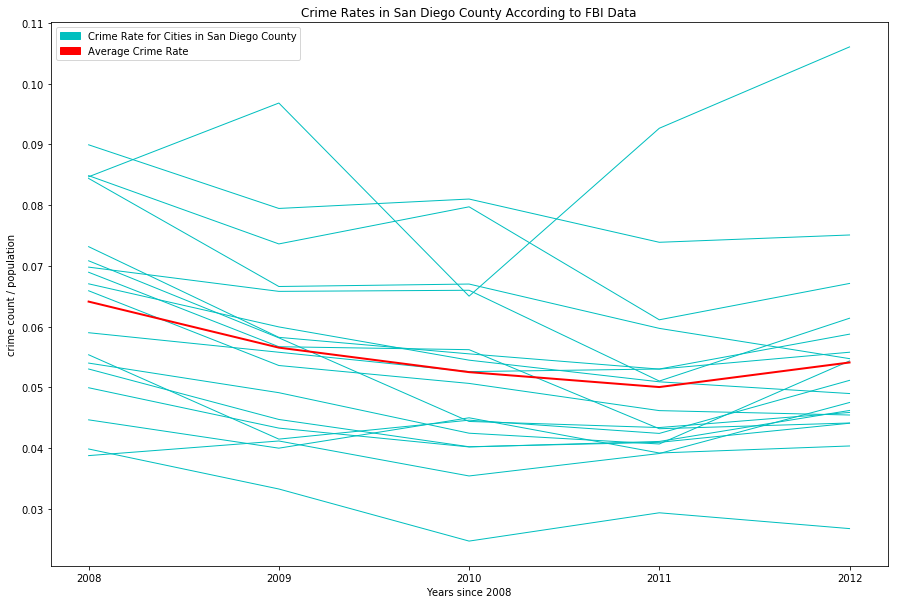

In [10]:
fbiavgrates()

### 1.7 Crime Data: California 
- Dataset Name: CALIFORNIA Offenses Known to Law Enforcement by Metropolitan and Nonmetropolitan Counties, 2012 
- Data Source: Federal Bureau of Investigation
- Number of observations: 301,859
- Link: https://ucr.fbi.gov/crime-in-the-u.s/2012/crime-in-the-u.s.-2012/tables/10tabledatadecpdf/table-10-state-cuts/table_10_offenses_known_to_law_enforcement_california_by_metropolitan_and_nonmetropolitan_counties_2012.xls

This dataset contains the county, and crimes categorized by violent crime, murder and nonnegligent manslaughter, forcible rape, robbery, aggravated assault, property crime, burglary, larceny-theft, motor vehicle theft, and arson in California from 2012.


**1.7.1 Cleaning Data:**
We summed up the data and added a column called total for the total number of crimes in each county.

> **Please RUN THIS first for BOKEH PLOT**

In [6]:
import pandas as pd
df_cc12 = pd.read_excel('crimes_total_county.xls', sheetname='12tbl10ca')
df_cc12 = df_cc12[['County','total']]

**1.7.2 Analysis of crime data by county:**

To examine how san diego county compared with other counties, we used Bokeh plot to visualize the differences.

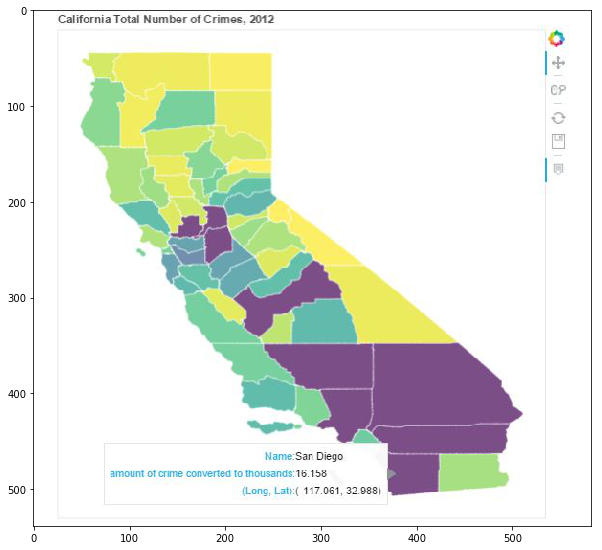

In [18]:
bokeh_ca_pic()

It appears San Diego has crime number around the same as Riverside and San Bernardino. We will need to have further investigation per 100 thousand residents and see the relative crime rates broken down to find out the true crime rate and compare it with the California state, which we will show below in further analysis.

> **Please RUN THIS second for BOKEH PLOT**

In [19]:
def bokeh_state_2012_crime():
    from bokeh.resources import INLINE
    import bokeh
    from bokeh.plotting import figure
    from bokeh.io import output_notebook, push_notebook, show
    from bokeh.models import (
            ColumnDataSource,
            HoverTool,
            LinearColorMapper
        )
    from bokeh.palettes import Viridis256 as palette
    from bokeh.plotting import figure
    from bokeh.sampledata.us_counties import data as counties
    palette.reverse()

    counties = {
        code: county for code, county in counties.items() if county["state"] == "ca"
    }

    county_xs = [county["lons"] for county in counties.values()]
    county_ys = [county["lats"] for county in counties.values()]

    county_names = [county['name'] for county in counties.values()]
    #county_rates = [unemployment[county_id] for county_id in counties]
    county_num = []
    for x in county_names:
        county_num.append(df_cc12[df_cc12['County'][:] == x]['total']/1000)
    color_mapper = LinearColorMapper(palette=palette)

    source = ColumnDataSource(data=dict(
        x=county_xs,
        y=county_ys,
        name=county_names,
        rate=county_num,
    ))

    TOOLS = "pan,wheel_zoom,reset,hover,save"

    p = figure(
        title="California Total Number of Crimes, 2012", tools=TOOLS,
        x_axis_location=None, y_axis_location=None
    )
    p.grid.grid_line_color = None

    p.patches('x', 'y', source=source,
              fill_color={'field': 'rate', 'transform': color_mapper},
              fill_alpha=0.7, line_color="white", line_width=0.5)

    hover = p.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [
        ("Name", "@name"),
        ("amount of crime converted to thousands", "@rate"),
        ("(Long, Lat)", "($x, $y)"),
    ]
    
    
    bokeh.io.output_notebook(INLINE)

    show(p)

> **Please RUN THIS third for BOKEH PLOT**

In [21]:
bokeh_state_2012_crime()
#since bokeh doesn't show on github


## 2. Combined Factors: Exploration and Analysis: 

In this section, the different factors that were analyzed separately in the above section will be combined and analyzed together. We believe that no one factor alone is enough to solely demonstrate gentrifcation, and so want to build a picture of these factors as a whole. The combination of this data will ultimately help move us forward in determining which definition of gentrification is most heavily supported by the data sets.

### 2.1 Income vs. Housing Prices

Goal is to figure out:
1. how many places can each income braket can afford?
2. where are these areas?

Rules of Thumb For How Much House You Can Afford on good credit:
1. According to CNN Money says 2.5 times of gross annual income
2. Washington Mutual Bank suggested up to 4-5 times (without debt)
3. Investopedia offers up 2 to 2.5 times of gross annual income

Here we are using 2.5 times for general rule of thumb.

**2.1.1 how many places can each income braket can afford?**

To look at how many places each income braket can afford, we first find the amount for each year taking the difference between average prices and 2.5 times the annual income. If the difference is negative, then it means the people from that income braket can afford it given the rule of thumb.

In [3]:
in_df = pd.read_csv('C:/Users/Lauren/COGS108/income.csv')

In [38]:
# separated increasing order of years since 2007
number_places_can_afford(2.5) 

median income number of places can afford: 
[0, 3, 11, 8, 10, 8]
low income number of places can afford: 
[0, 2, 6, 8, 8, 6]
very low income number of places can afford: 
[0, 1, 1, 2, 2, 1]
lowest income number of places can afford: 
[0, 0, 1, 0, 0, 1]


**2.1.2 What are the areas can each income braket can afford?**

Wow! we see that even for someone in the lowest income bracket, there is still two areas (corresponding to zipcode) they can afford! 

*Let's find out what these areas are!*

In [41]:
# separated increasing order of years since 2007
areas_can_afford_med_low(2.5)
areas_can_afford_vlow_lowest(2.5)

median income afforable areas: 
[None, ['Boulevard', 'Jacumba_Hot_Springs', 'Potrero'], ['Boulevard', 'Campo', 'Dulzura', 'Jacumba_Hot_Springs', 'National_City', 'Borrego_Springs', 'Ranchita', 'Golden_Hill', 'Oak_Park', 'Barrio_Logan', 'San_Ysidro'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Potrero', 'Borrego_Springs', 'Ranchita', 'Barrio_Logan', 'San_Ysidro'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Borrego_Springs', 'Ranchita', 'Warner_Springs', 'Golden_Hill', 'Oak_Park', 'Barrio_Logan', 'San_Ysidro'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Potrero', 'Borrego_Springs', 'Ranchita', 'Warner_Springs', 'Barrio_Logan']]

low income afforable areas: 
[None, ['Boulevard', 'Jacumba_Hot_Springs'], ['Campo', 'Jacumba_Hot_Springs', 'Borrego_Springs', 'Ranchita', 'Oak_Park', 'Barrio_Logan'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Potrero', 'Borrego_Springs', 'Ranchita', 'Barrio_Logan', 'San_Ysidro'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Borrego_Springs', 'R

Let's examine the by year!

In [33]:
# number of houses people can afford
num_can_afford(2.5)

In 2007 there is total of 0 places that people in low incomes can afford 
 and there is 0 places that the median income people can afford.
In 2008 there is total of 2 places that people in low incomes can afford 
 and there is 3 places that the median income people can afford.
In 2009 there is total of 6 places that people in low incomes can afford 
 and there is 11 places that the median income people can afford.
In 2010 there is total of 8 places that people in low incomes can afford 
 and there is 8 places that the median income people can afford.
In 2011 there is total of 8 places that people in low incomes can afford 
 and there is 10 places that the median income people can afford.
In 2012 there is total of 6 places that people in low incomes can afford 
 and there is 8 places that the median income people can afford.


Let's visually examine this!

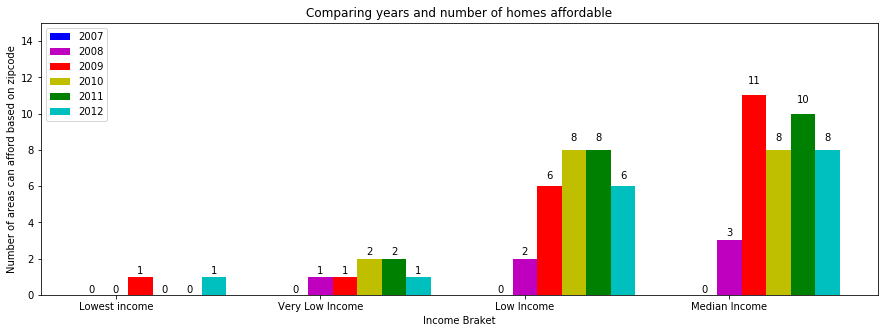

In [34]:
number_affordable_bar(2.5)

Overall in 2007 no one can afford anything. However, after the housing crash, low income can afford a little more.

### 2.2 Theoretical Crime vs Observation Crime (SD County vs. SD City)

Goal: To examine if the observed crime data has the same distribution as the theoretical

First, we look at the crime in california state overall for 2007-2012.

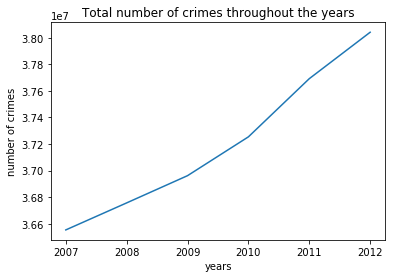

In [49]:
ca_state_crime = [36553215, 36756666, 36961664, 37253956, 37691912, 38041430]
total_crime_amount()

Looks like it went up!? but we also have more people!
Lets look at crime per 100,000 inhabitants.

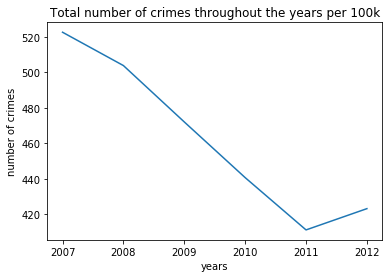

In [50]:
ca_crime_per100k = [522.6, 503.8, 472.0, 440.6, 411.1, 423.1] #according to FBI
total_crime_amount_less()

After adjusting it based on population, crime went down for California as a whole!

**2.2.1 San Diego County**

We compare the theoretical with the observations first with San Diego County.

We calculated the theoretical number of crimes supposed to happen in SD county if it is the same as CA as a whole.
To do that first we grab the total number of people in San Diego county

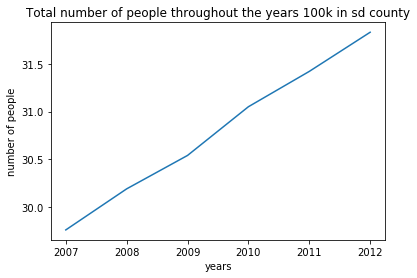

In [52]:
sd_pop_million = [2.976,3.019,3.054,3.105,3.142, 3.183]
sd_pop_100k = [x*10 for x in sd_pop_million]
total_pop_amount()

Then we use that to calculate the theoretical amount of crime.

In [53]:
theo_crime = []
for i in np.arange(6):
    theo_crime.append(ca_crime_per100k[i]*sd_pop_100k[i])

In [54]:
theo_crime_county = []
for i in np.arange(6):
    theo_crime_county.append(ca_crime_per100k [i] *sd_pop_100k[i])

In [55]:
crime_county = [18584, 17983, 15137, 14872, 14523, 16158]

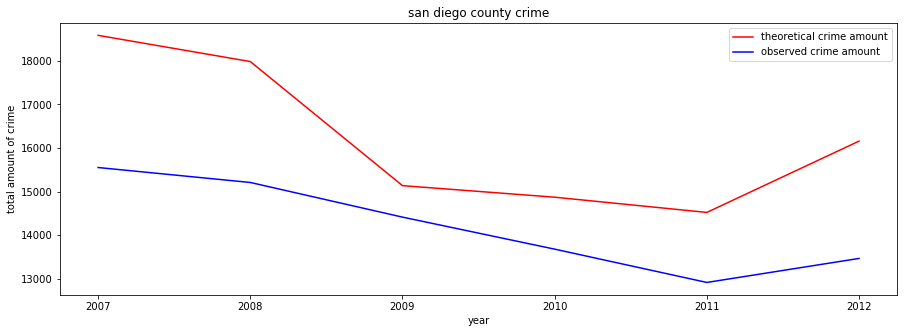

In [57]:
san_diego_county_crime()

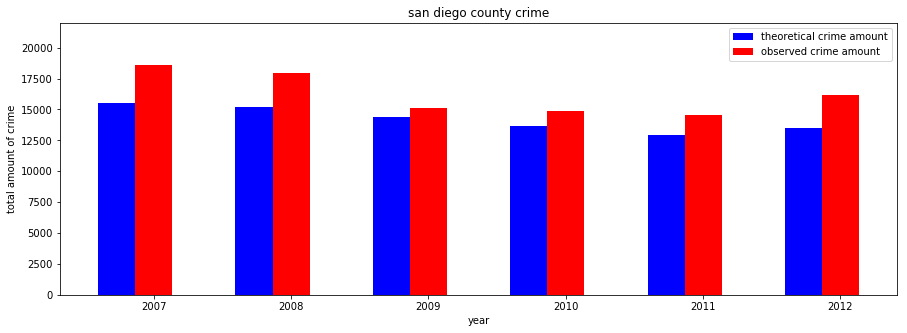

In [67]:
san_diego_county_crime_bar()

We exmine it via scatter plot to visualize it.

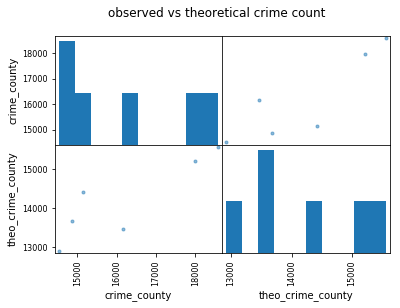

In [72]:
observed_theoretical_scatter()

Looks like the observed is more than theoretical! Is the difference significant though?

In [81]:
county_ols_regression_results()

                            OLS Regression Results                            
Dep. Variable:      theo_crime_county   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     12.31
Date:                Tue, 13 Jun 2017   Prob (F-statistic):             0.0247
Time:                        19:00:45   Log-Likelihood:                -45.399
No. Observations:                   6   AIC:                             94.80
Df Residuals:                       4   BIC:                             94.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     5675.3109   2443.291      2.323   

Although the R-squared value is relatively high, because there is only 6 years for observation, we will use f test to test variation and rank sum test to compare because it is non-parametric.

In [48]:
sp.stats.f_oneway(theo_crime_county, crime_county)

F_onewayResult(statistic=6.0399711393677409, pvalue=0.033813044974404738)

The p-value for the variation is statistically different. We fail to accept that the two distribution have the same true variation.

In [49]:
sp.stats.ranksums(crime_county, theo_crime_county)

RanksumsResult(statistic=1.9215378456610455, pvalue=0.054663935891675154)

Even though they don't have the same true variation, we fail to reject that the difference is statistically significant.

**2.2.2 San Diego City**

we run through the same analysis pipeline as county for the city.

In [74]:
sdcity_pop_million = [1.298,1.306,1.306,1.306,1.321, 1.34]
sdcity_pop_100k = [x*10 for x in sdcity_pop_million]
theo_crime_city = []
for i in np.arange(6):
    theo_crime_city.append(ca_crime_per100k [i]*sdcity_pop_100k[i])
crime_city = [7797.0, 7619.0, 6624.0, 6180.0, 5664.0, 5611.0] #sd city

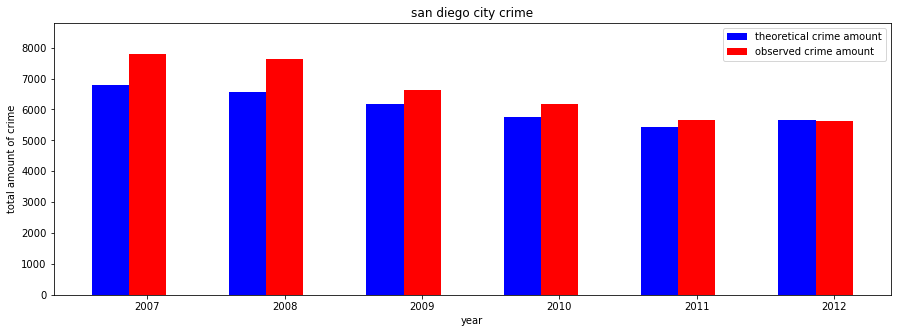

In [76]:
san_diego_city_crime()

The difference appears less than the county, let us examine further.

In [79]:
city_ols_regression_results()

                            OLS Regression Results                            
Dep. Variable:        theo_crime_city   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     100.7
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           0.000555
Time:                        18:58:49   Log-Likelihood:                -35.898
No. Observations:                   6   AIC:                             75.80
Df Residuals:                       4   BIC:                             75.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2404.3103    367.840      6.536      0.0

The R-squared value is even higher in this one. Let's test variance and rank-sum non parametric test!

In [57]:
sp.stats.f_oneway(theo_crime_city, crime_city)

F_onewayResult(statistic=1.3582785854799111, pvalue=0.27088211951495406)

Since the p-value for the F test is high, we fail to reject that the theoretical and the observed city crime data has the same variation. 

In [58]:
sp.stats.ranksums(crime_city, theo_crime_city)

RanksumsResult(statistic=0.80064076902543568, pvalue=0.42333964158244364)

Since the p-value is large for rank sums test as well, we cannot reject that the observed city crime data has the same distribution as the theoretrical.

**What we found** 
based on the evidence above, we can conclude that san diego county and city does not differ from california trend of crime. Thus, if the crime amount decrease in gentrified areas, it shows that it can be due to the general decrease for san diego and california as a whole.

## 3. Categorizing Gentrified Areas: 

We are looking at areas over time to identify which areas were afforable and crime changes within these areas.

### 3.1 Identify the gentrified areas

In [51]:
areas_can_afford_med_low(2.5)

median income afforable areas: 
[None, ['Boulevard', 'Jacumba_Hot_Springs', 'Potrero'], ['Boulevard', 'Campo', 'Dulzura', 'Jacumba_Hot_Springs', 'National_City', 'Borrego_Springs', 'Ranchita', 'Golden_Hill', 'Oak_Park', 'Barrio_Logan', 'San_Ysidro'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Potrero', 'Borrego_Springs', 'Ranchita', 'Barrio_Logan', 'San_Ysidro'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Borrego_Springs', 'Ranchita', 'Warner_Springs', 'Golden_Hill', 'Oak_Park', 'Barrio_Logan', 'San_Ysidro'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Potrero', 'Borrego_Springs', 'Ranchita', 'Warner_Springs', 'Barrio_Logan']]

low income afforable areas: 
[None, ['Boulevard', 'Jacumba_Hot_Springs'], ['Campo', 'Jacumba_Hot_Springs', 'Borrego_Springs', 'Ranchita', 'Oak_Park', 'Barrio_Logan'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Potrero', 'Borrego_Springs', 'Ranchita', 'Barrio_Logan', 'San_Ysidro'], ['Boulevard', 'Campo', 'Jacumba_Hot_Springs', 'Borrego_Springs', 'R

> Because of the housing market crash in 2008, there was an initial increase in housing afforability starting from 2009. <br>
Therefore, throughout the years, **Barrio Logan** and **San Ysidro** both became afforable for low income earners in 2010 and 2011.
<br> However, in 2012, housing prices in these areas increased, leading to our identification of these two areas as **_gentrified_**.

We identify areas as **_non gentrified_** for areas not listed above. <br>
Thus, we choose **National City** for low income relatively affordable and **Ocean Beach** for not affordable, will be examined as indicators for comparison.

To visualize the changes in housing prices for these areas:

First we visualize the gentrified areas separately.

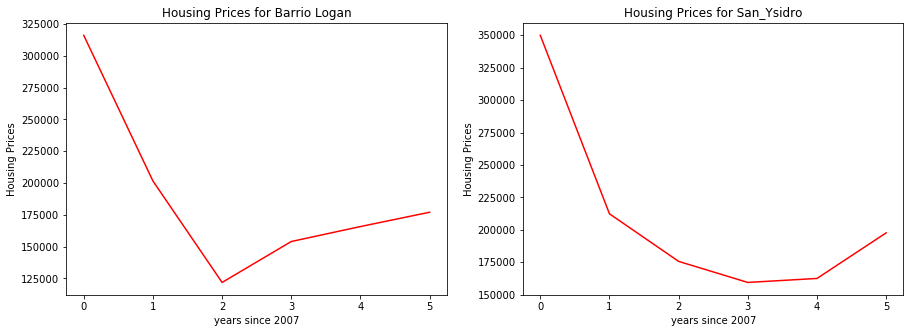

In [84]:
logan_ysidro()

We look at non gentrified areas and gentrified areas groupped separately in two plots.

NameError: name 'in_df' is not defined

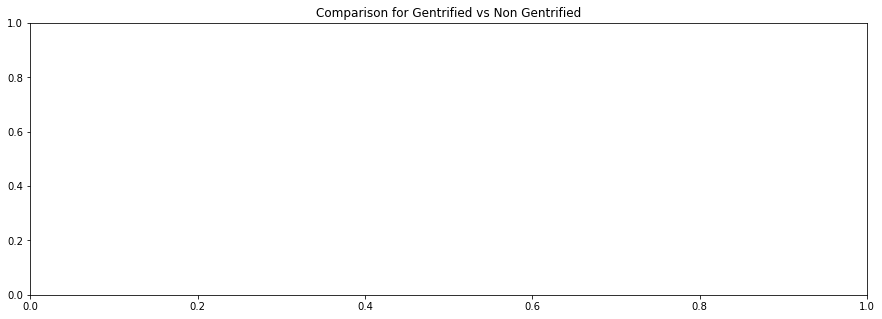

In [87]:
plt.figure(figsize=(15,5))
plt.title('Comparison for Gentrified vs Non Gentrified')

# San_Ysidro
sy = []
for yr in np.arange(2007,2013):
    sy.append(overaff_all(yr,'Low Income',2.5)[94])
plt.plot(sy,color = 'r')

# Barrio Logan
bl = []
for yr in np.arange(2007,2013):
    bl.append(overaff_all(yr,'Low Income',2.5)[74])
plt.plot(bl,color = 'y')



#plt.plot(hp[0][:].T[:][69], color = 'b')
# National City
#plt.plot(hp[0][:].T[:][17], color = 'g')
nc = []
for yr in np.arange(2007,2013):
    nc.append(overaff_all(yr,'Low Income',2.5)[17])
plt.plot(nc, color = 'g')


# Ocean Beach
ob = []
for yr in np.arange(2007,2013):
    ob.append(overaff_all(yr,'Low Income',2.5)[69])
plt.plot(ob, color = 'b')

plt.plot(pay_area(2), color = 'lightgrey', linewidth=1.0)
plt.plot(pay_area(3), color = 'lightgrey', linewidth=1.0)
plt.plot(pay_area(12), color = 'lightgrey', linewidth=1.0)
plt.plot(pay_area(23), color = 'lightgrey', linewidth=1.0)
plt.plot(pay_area(50), color = 'lightgrey', linewidth=1.0)

#plt.hlines(0,0,5,linewidth=1.0)
plt.legend(('Gentrified (SY)','Gentrified (BL)','Non Gentrified not Affordable','Non Gentrified Relatively Affordable', 'Low Income Affordable'))
plt.ylabel('Affordability')
labels = np.arange(2007,2013)
x = [0,1,2,3,4,5]
_ = plt.xticks(x, labels, rotation='vertical')


Lastly, we look at the changes in the same plot to get a clearer representation.

Let's look at change in crime rates from 2010-2012 within these areas. For the identified areas that underwent gentrification, San Ysidro and Barrio Logan, crime rate decreased or remained stable. National City, a nongentrified  and relatively affordable, the crime rate drastically dropped within this time period. Ocean Beach, also nongentrified, generally experienced a stable trend in crime rate. 

From these observations, 

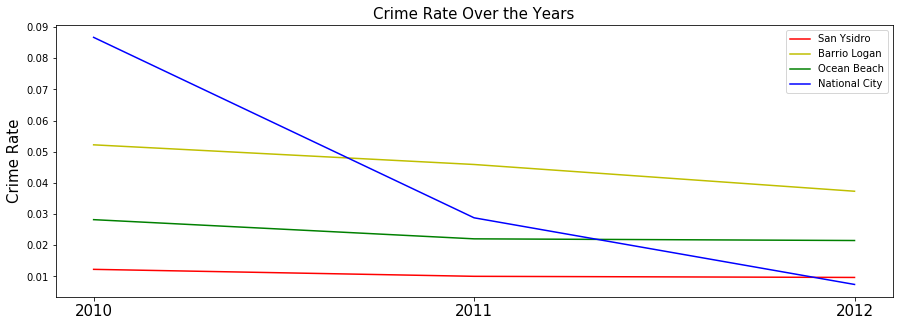

In [5]:
crime_comparison()

Looking at different neighborhoods within San Diego city, there is a general trend of decrease in crime count throughout the years.  

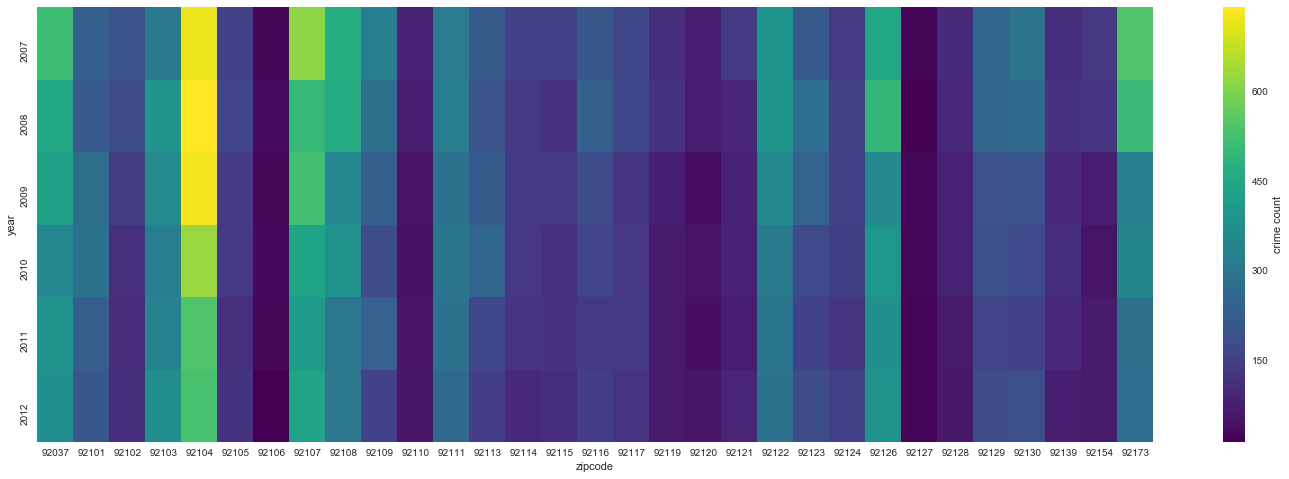

In [7]:
SDcity_heatmap()

## 4. Overall Comparison

In this section, ....

### A. 2008-2012 Comparison: Across All Year and Over All Areas 

We want to see the trends of housing prices and crime rates for every city in San Diego County from 2008 - 2012

In [18]:
with h5py.File(h5_file, 'r') as h5:
    dset = h5['avg_house_price_per_city']
    houseStack = dset[:][:]

We look at the average house price and average crime rates for each city in San Diego County from 2008 - 2012 to get a better look on whether or not increasing house prices follows with decrease crime rates.

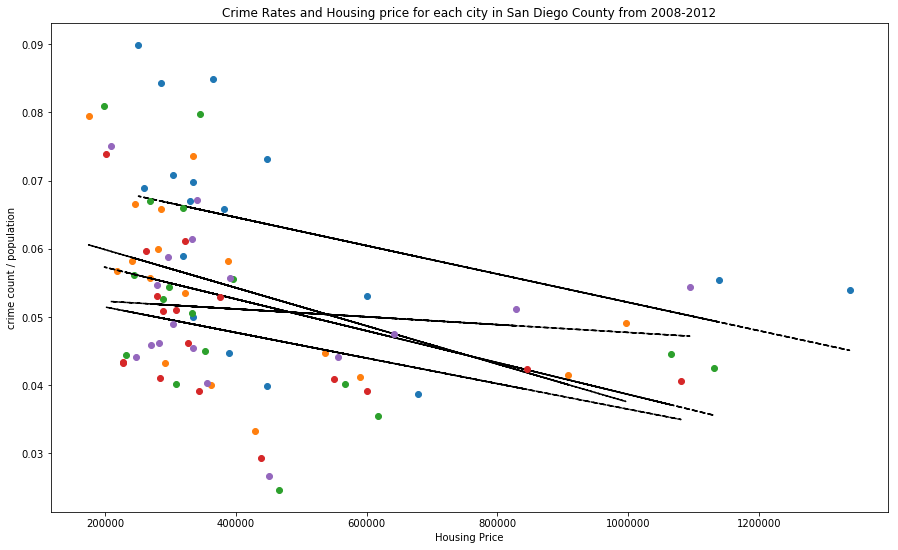

In [19]:
crimeXhouse()

### B. 2012 Comparison: Using Demogrpahics 

We want to compare housing prices within 2012 for the selected areas we have data on for demographics.

In [5]:
with h5py.File(h5_file, 'r') as h5:
    dset = h5['hp_pop_new']
    hp_pop = []
    hp_pop.append(dset[:])

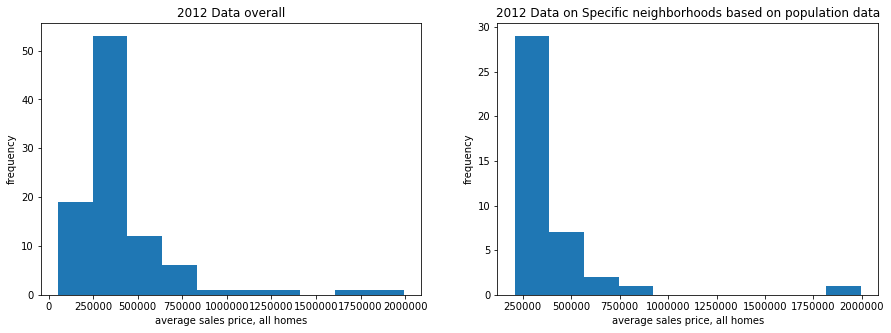

In [62]:
plt.figure(figsize=(15,5))

_ = plt.subplot(1,2,1)
# overall 2012 data
plt.hist(hp[0][5])
plt.xlabel('Housing Prices')
plt.ylabel('frequency')
plt.title('2012 Data overall')

_ =plt.subplot(1,2,2)
# specified data
plt.hist(hp_pop)
plt.xlabel('Housing Prices')
plt.ylabel('frequency')
plt.title('2012 Data on Specific neighborhoods based on population data')

This shows the data on specific neighborhoods represents the overall data relatively well.

To look at the data further, we want to find out which areas each income braket can afford within the selected areas for 2012.

In [63]:
# print what people can afford based on different times of annual income
print_can_afford()

2.5 times the income:
median income can afford: 0 area: None
low income can afford: 0 area: None
lowest income can afford: 0 area: None
3 times the income:
median income can afford: 1 area: ['National_City']
low income can afford: 0 area: None
lowest income can afford: 0 area: None
3.5 times the income:
median income can afford: 8 area: ['Oceanside', 'Vista', 'National_City', 'Chula_Vista', 'Spring_Valley', 'Lemon_Grove', 'El_Cajon', 'Escondido']
low income can afford: 1 area: ['National_City']
lowest income can afford: 0 area: None
4 times the income:
median income can afford: 17 area: ['Oceanside', 'Oceanside', 'Vista', 'National_City', 'Chula_Vista', 'Chula_Vista', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'El_Cajon', 'El_Cajon', 'Lakeside', 'Poway', 'Escondido', 'Escondido', 'Escondido']
low income can afford: 6 area: ['Oceanside', 'Vista', 'National_City', 'Chula_Vista', 'Spring_Valley', 'Lemon_Grove']
lowest income can afford: 0 area: None
4.5 times the income:
media

## 5. Conclusions:


### A. General Conclusions/Discussion

For gentrified areas, we expected crime rates to go down, and for housing prices to increase within the years of gentrification. We observed this trend in our data concerning housing price affordability. Gentrified areas became less affordable when compared to other low-income neighborhoods that were not gentrified. 

For non-gentrified areas, we expected that crime rates would remain relatively similar to the theoretical California crime rate. Our findings are as follows:

Overall, without looking at specific gentrified or non-gentrified areas, crime rate decreased overtime—both within San Diego City, County and California as a whole. Our graphs show that National City (a non-gentrified, low income, relatively affordable area) had a significant decrease in crime rate. On the other hand, Barrio Logan and San Ysidro (two gentrified areas) had relatively stagnant crime rates. However, San Diego City as a whole decreased in terms of crime rates. This demonstrates that crime rates within these gentrified areas stayed the same. Gentrification seemed to have no major effect on these cities. Crime did not seem to migrate to other areas.

Pitfalls within are data includes the generalization of crime. The factors that influence incidents of crime are complex and often difficult to quantify, such as police bias and sociol dynamics within a community. For the data presented, crime includes violence against another individual as well as DUI, theft, sex crimes, and multiple other categories. Suppose an area rennovates and brings in new and higher tier shops to their community. This can cause an increase in crimes due to increases in theft and therefore, skew the data in a way that misrepresents in area's crime. Moreover, if an area undergoes gentrification, individuals that move into the community are often from a different demographic than the exisiting locals. If tension arises between populations in the community, this can also lead to another factor of crime that is difficult to assess. To improve the analysis of crime, each type of crime would need to be weighted based on severity in order to better represents each area's crime rate. 

### B. Other Visualizations

For each year, we calculated the average of crime counts and compared the value to the crime counts of each area in the City of San Diego. The visual below reveals the total number of areas that fall below or above the average for each year.

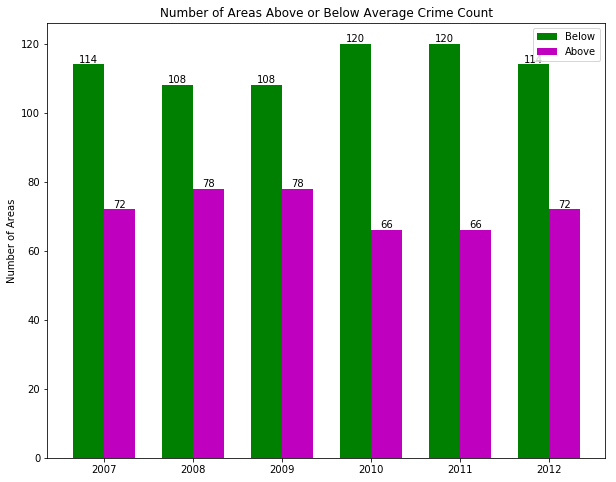

In [42]:
compare_SDcity_avg()

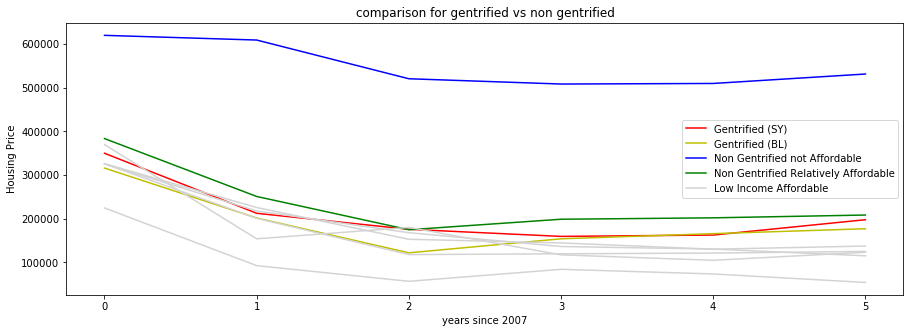

In [6]:
compare_gentrified_non()


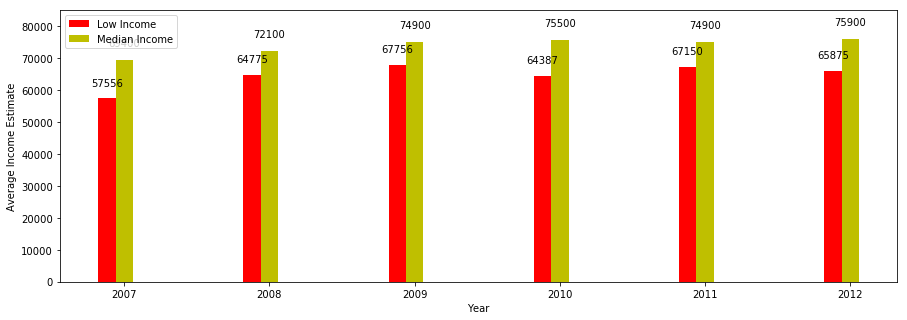

In [11]:
# Create multi bar graph to display information of low income and median brackets
N = 6
fig = plt.figure(1,figsize=(15,5))
ind = np.arange(N)
width = 0.12
ax = fig.add_subplot(111)

# graph low and median income estimate brackets 
makeGraph(df_all, 'Low Income', 'r', ind)
makeGraph(df_all, 'Median Income', 'y', ind+width)

# label graph
labelGraph()
ax.legend(('Low Income', 'Median Income'))

plt.figure(1, figsize=(50,40))
plt.show()

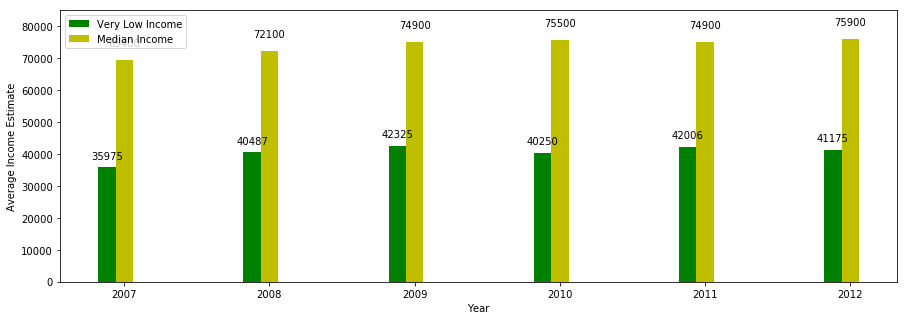

In [12]:
# Create multi bar graph to display information of very low income and median brackets
N = 6
fig = plt.figure(1,figsize=(15,5))
ind = np.arange(N)
width = 0.12
ax = fig.add_subplot(111)

# graph vey low and median income estimate brackets 
makeGraph(df_all, 'Very Low Income', 'g', ind)
makeGraph(df_all, 'Median Income', 'y', ind+width)

# label graph
labelGraph()
ax.legend(('Very Low Income', 'Median Income'))

plt.figure(1, figsize=(50,40))
plt.show()

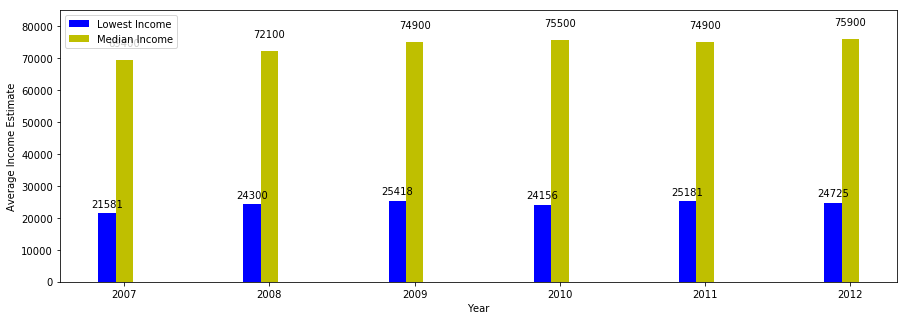

In [13]:
# Create multi bar graph to display information of lowest income and median brackets
N = 6
fig = plt.figure(1,figsize=(15,5))
ind = np.arange(N)
width = 0.12
ax = fig.add_subplot(111)

# graph lowest and median income estimate brackets 
makeGraph(df_all, 'Lowest Income', 'b', ind)
makeGraph(df_all, 'Median Income', 'y', ind+width)

# label graph
labelGraph()
ax.legend(('Lowest Income', 'Median Income'))

plt.figure(1, figsize=(50,40))
plt.show()

## Appendix

We include additional references for lists and functions we have created.

Here we have all the zipcode and area references.

In [9]:
# all zipcode area references
zipcode = [92154, 92024, 92007, 92008, 92009, 92010, 92011, 92014, 92019,
            92020, 92021, 92025, 92003, 92026, 92027, 92028, 92029, 92036,
            92037, 92040, 92054, 92056, 92004, 91978, 92058, 91916, 91901,
            91902, 91905, 91906, 91910, 91911, 91913, 91914, 91915, 91917,
            91977, 91932, 91934, 91935, 91941, 91942, 91945, 91950, 91962,
            91963, 92057, 92059, 92139, 92120, 92110, 92111, 92113, 92114,
            92115, 92116, 92117, 92118, 92119, 92121, 92108, 92122, 92123,
            92124, 92126, 92127, 92128, 92129, 92130, 92131, 92109, 92107,
            92061, 92081, 92064, 92065, 92066, 92067, 92069, 92070, 92071,
            92075, 92078, 92082, 92106, 92083, 92084, 92086, 92091, 92101,
            92102, 92103, 92104, 92105, 92173]
area = ['Alpine','Bonita','Boulevard','Campo','Chula_Vista','Chula_Vista','Chula_Vista','Chula_Vista','Chula_Vista','Descanso','Dulzura','Imperial_Beach','Jacumba_Hot_Springs','Jamul','La_Mesa','La_Mesa','Lemon_Grove','National_City','Pine_Valley','Potrero','Spring_Valley','Spring_Valley','Bonsall','Borrego_Springs','Cardiff','Carlsbad','Carlsbad','Carlsbad','Carlsbad','Del_Mar','El_Cajon','El_Cajon','El_Cajon','Encinitas','Escondido','Escondido','Escondido','Fallbrook','Escondido','Julian','La_Jolla','Lakeside','Oceanside','Oceanside','Oceanside','Oceanside','Pala','Pauma_Valley','Poway','Ramona','Ranchita','Rancho_Santa_Fe','San_Marcos','Santa_Ysabel','Santee','Solana_Beach','San_Marcos','Vista','Valley_Center','Vista','Vista','Warner_Springs','Rancho_Santa_Fe','Gaslamp','Golden_Hill','Hillcrest','North_Park','Oak_Park','Wooded_Area','Ocean_Beach','Mission_Valley_East','Mission_Beach','Old_Town','Clairemont_Mesa_East','Barrio_Logan','Encanto','El_Cerrito','Normal_Heights','North_Clairemont','Coronado','San_Carlos','Del_Cerro','Sorrento_Valley','University_City','Serra_Mesa','Tierrasanta','Mira_Mesa','Black_Mountain_Ranch','Carmel_Mountain','Rancho_Penasquitos','Carmel_Valley','Scipps_Ranch','Paradise_Hills','Otay_Mesa','San_Ysidro']

In [10]:
dict_zipcode_area = dict(zip(zipcode, area))
df_area_zipcode = pd.read_csv('C:/Users/Lauren/COGS108/area_zip_dict.csv')

In [11]:
# zipcode area references for 2012 selected area by demographics
pop_zipcode = ['92008 92009 92010 92011', '92054 92056 92057 92058', '92081 92083 92084','92118','91950','91910 91911 91913 91914 91915','91935',
 '91977 91978','91945','91941 91942','92019 92020 92021','92071','92040','91901','92064','92065','92025 92026 92027 92029','92069 92078','92082','92028']
pop_zipcode_hp_ind = [25, 26, 27, 28, 42, 43, 44, 45, 57, 59, 60, 79, 17, 4, 5, 6, 7, 8, 13, 20, 21, 16, 14, 15, 30, 31, 32, 54, 41, 0, 48, 49, 34, 35, 36, 38, 52, 56, 58, 37] 
pop_area = ['Carlsbad', 'Oceanside', 'Vista', 'Coronado', 'National_City', 'Chula_Vista', 'Jamul', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'Santee', 'Lakeside', 'Alpine', 'Poway', 'Ramona', 'Escondido', 'San_Marcos', 'Valley_Center', 'Fallbrook']

In [12]:
# correspond to all the demographic areas separated by zipcode
area_2012 =['Carlsbad',
 'Carlsbad',
 'Carlsbad',
 'Carlsbad',
 'Oceanside',
 'Oceanside',
 'Oceanside',
 'Oceanside',
 'Vista',
 'Vista',
 'Vista',
 'Coronado',
 'National_City',
 'Chula_Vista',
 'Chula_Vista',
 'Chula_Vista',
 'Chula_Vista',
 'Chula_Vista',
 'Jamul',
 'Spring_Valley',
 'Spring_Valley',
 'Lemon_Grove',
 'La_Mesa',
 'La_Mesa',
 'El_Cajon',
 'El_Cajon',
 'El_Cajon',
 'Santee',
 'Lakeside',
 'Alpine',
 'Poway',
 'Ramona',
 'Escondido',
 'Escondido',
 'Escondido',
 'Escondido',
 'San_Marcos',
 'San_Marcos',
 'Valley_Center',
 'Fallbrook']

Here we will include all the methods used in cleaning/analyzing code. We moved it to the bottom to make the layout of the notebook less cluttered.

In [13]:
def pay_area(area):
    lst = []
    for yr in np.arange(2007,2013):
        lst.append(overaff_all(yr,'Low Income',2.5)[area])
    return lst

In [60]:
# Method used to convert data found within a dataframe from object to float
def convertData(dataframe):
        deep_dataframe = dataframe.copy(deep=True)
        for i in range(len(deep_dataframe)):
            deep_dataframe.iloc[i] = [x.replace(',', '') for x in deep_dataframe.iloc[i]]
            deep_dataframe.iloc[i] = deep_dataframe.iloc[i].astype(float)
            plt.plot(deep_dataframe.iloc[i])
        return deep_dataframe  

# Method used to label the axis of the graphs
def labelAxis(title, xAxis, yAxis, x, y):
    plt.title(title)
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    if (x != 0 and y != 0):
        plt.ylim([x,y])
        
# Method to print legend        
def printLegend(string):
    plt.legend(['1 person', '2 people', '3 people', '4 people', '5 people',
               '6 people', '7 people', '8 people'], loc=string)
    
# Method used to return the average of a particular group within a year
def getAverage(dataframe2, string):
        dataframe = dataframe2
        dataframe[string] = [x.replace(',', '') for x in dataframe2[string]]
        dataframe[string] = dataframe[string].astype(float)
        income = dataframe[string].tolist()
        
        inc = 0.0
        for i in range(len(income)):
            inc+=income[i]
        inc = inc/8
        return inc 

# method to help label values inside graph
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

# method to help create a bar graph for the data
def makeGraph(df, string, clr, ind):
    income = [df.T[string].iloc[0], df.T[string].iloc[1],
            df.T[string].iloc[2], df.T[string].iloc[3],
            df.T[string].iloc[4], df.T[string].iloc[5]]
    incomeRect = ax.bar(ind, income, 0.12, color=clr)
    autolabel(incomeRect) 

# method to help label bar graphs
def labelGraph():
    ind = np.arange(N)
    width = 0.12
    ax.set_ylabel('Average Income Estimate')
    ax.set_xlabel('Year')
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('2007', '2008', '2009', '2010', '2011', '2012') )
    plt.ylim([0,85000])

# method for creating new dataframes
def createDF(string, val):
    df = pd.DataFrame(columns=['2007', '2008', '2009', 
                               '2010', '2011', '2012'], index = [string])
    df.loc[string] = pd.Series({'2007':val[0],'2008':val[1],
            '2009':val[2],'2010':val[3], '2011':val[4],'2012':val[5]})
    return df

# method for computing averages of estimated income
def makeAvgArray(df):
    years = ['2007', '2008', '2009', '2010', '2011', '2012']
    arrays = []
    for i in range(6):
        arrays.append(getAverage(df, years[i]))
                     
    return arrays

### 1.2) Housing Prices Functions

In [11]:
def housing_price_changes():
    _ = plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.plot(hp[:][0])
    plt.xlabel('years since 2007')
    plt.ylabel('Housing Price')
    plt.title('Changes in Housing Prices over time where each line is zipcode')

    # prices across zipcodes color = each year
    plt.subplot(1,2,2)
    plt.xlabel('zipcodes')
    plt.ylabel('Housing Price')
    plt.title('Changes in Housing Prices over time where each color is year')
    _ = plt.plot(hp[:][0].T,'.')

In [15]:
# visualize the differences within areas for multiple zipcodes
def multi_zipcode_in_area():
    plt.figure(1,figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title(area[20])
    plt.plot(hp[0][:].T[:][20])
    plt.plot(hp[0][:].T[:][21])
    plt.ylabel('Housing Price')
    plt.xlabel('years since 2007')
    plt.subplot(1,3,2)
    plt.title(area[30])
    plt.plot(hp[0][:].T[:][30])
    plt.plot(hp[0][:].T[:][31])
    plt.plot(hp[0][:].T[:][32])
    plt.xlabel('years since 2007')
    plt.subplot(1,3,3)
    plt.title(area[25])
    plt.plot(hp[0][:].T[:][25])
    plt.plot(hp[0][:].T[:][26])
    plt.plot(hp[0][:].T[:][27])
    plt.plot(hp[0][:].T[:][28])
    plt.xlabel('years since 2007')

    plt.figure(2,figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title(area[14])
    plt.plot(hp[0][:].T[:][14])
    plt.plot(hp[0][:].T[:][15])
    plt.ylabel('Housing Price')
    plt.xlabel('years since 2007')
    plt.subplot(1,3,2)
    plt.title(area[52])
    plt.plot(hp[0][:].T[:][52])
    plt.plot(hp[0][:].T[:][56])
    plt.xlabel('years since 2007')
    plt.subplot(1,3,3)
    plt.title(area[4])
    plt.plot(hp[0][:].T[:][4])
    plt.plot(hp[0][:].T[:][5])
    plt.plot(hp[0][:].T[:][6])
    plt.plot(hp[0][:].T[:][7])
    plt.plot(hp[0][:].T[:][8])
    plt.xlabel('years since 2007')

    plt.figure(3,figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title(area[57])
    plt.plot(hp[0][:].T[:][57])
    plt.plot(hp[0][:].T[:][59])
    plt.plot(hp[0][:].T[:][60])
    plt.ylabel('Housing Price')
    plt.xlabel('years since 2007')
    plt.subplot(1,3,2)

    plt.title(area[42])
    plt.plot(hp[0][:].T[:][42])
    plt.plot(hp[0][:].T[:][43])
    plt.plot(hp[0][:].T[:][44])
    plt.plot(hp[0][:].T[:][45])
    plt.xlabel('years since 2007')
    plt.subplot(1,3,3)

    plt.title(area[34])
    plt.plot(hp[0][:].T[:][34])
    plt.plot(hp[0][:].T[:][35])
    plt.plot(hp[0][:].T[:][36])
    plt.plot(hp[0][:].T[:][38])
    plt.xlabel('years since 2007')

    plt.figure(4,figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title(area[51])
    plt.plot(hp[0][:].T[:][51])
    plt.plot(hp[0][:].T[:][62])
    plt.ylabel('Housing Price')
    plt.xlabel('years since 2007')

In [13]:
def comparing_housing_prices():
    N = 95
    ind = np.arange(N)
    width = .66

    fig = plt.figure(1,figsize=(15,5))
    ax = fig.add_subplot(111)
    # 2007
    hp07Rect = ax.bar(ind, hp[0][0], width, color='b')
    # 2012
    hp12Rect = ax.bar(ind, hp[0][5], width, color='y')

    ax.set_ylabel('Housing Prices')
    ax.set_xlabel('Area')
    plt.ylim([0,3000000])
    ax.legend(('2007', '2012'))

    plt.title("Comparing 2007 and 2012 Housing Prices")
    plt.show()

In [15]:
def amount_of_houses():
    plt.title('Amount of houses at each price point')
    plt.xlabel('Housing Prices')
    plt.ylabel('Number of Houses')
    _ = plt.hist(hp[0][:][:].T)

### 1.3) Demographics Functions

In [33]:
def demographicsCount():
    N = 20
    ind = np.arange(N)
    fig = plt.figure(1,figsize=(20,7))
    ax = fig.add_subplot(111)
    width = .20


    ax.bar(ind+width*1, [item[0] for item in dem], width, color='c')
    ax.bar(ind+width*2, [item[1] for item in dem], width, color='r')
    ax.bar(ind+width*3, [item[2] for item in dem], width, color='g')
    ax.bar(ind+width*4, [item[3] for item in dem], width, color='y')

    ax.set_title('San Diego County Demographics')
    ax.legend( ("White", "Hispanic", "Black", "Asian"))
    ax.set_ylabel('Population of the demographic')
    ax.set_xlabel('Cities')
    ax.set_xticklabels(('Carlsbad', 'Oceanside', 'Vista', 'Coronado', 'National_City', 'Chula_Vista', 'Jamul', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'Santee', 'Lakeside', 'Alpine', 'Poway', 'Ramona', 'Escondido', 'San_Marcos', 'Valley_Center', 'Fallbrook'), rotation='vertical')
    ax.set_xticks(ind+width)

    plt.show()

In [34]:
def demCloser():
    plt.figure(1,figsize=(15,5))
    plt.xlabel('Cities')
    plt.ylabel('Population of the demographic')
    plt.title('San Diego County Demographics')
    plt.xticks(range(20), ['Carlsbad', 'Oceanside', 'Vista', 'Coronado', 'National_City', 'Chula_Vista', 'Jamul', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'Santee', 'Lakeside', 'Alpine', 'Poway', 'Ramona', 'Escondido', 'San_Marcos', 'Valley_Center', 'Fallbrook'], rotation='vertical')
    _ = plt.plot(dem[:][:],'.')
    _ = plt.legend(['White', 'Hispanic', 'Black', 'Asian'], loc="upper right")

### 1.4) Crime Data: San Diego City Functions

In [29]:
# Plot city of San Diego crime rates 2007-2012
def SD_city_crime_overtime():
    plt.figure(1,figsize=(15,5))
    plt.xlabel('Years since 2007')
    plt.ylabel('Crime Count in San Diego Neighborhoods')
    plt.title('San Diego City Crime Incidents, 2007-2012')
    _ = plt.plot(crimebread[:][:])

#plot crime incidents in San Diego county for each zipcode over the years
def SD_County_Crime_Overtime():
    plt.figure(1,figsize=(15,5))
    plt.xlabel('Years since 2008')
    plt.ylabel('Number of Crime incidents')
    plt.title('San Diego County Crime incidents, 2008 - 2012')
    _ = plt.plot(SD_crimebread[:][:])

In [31]:
def SD_city_crime_3D():
    #create array that stores number of crime counts per year
    numcr = []
    for i in range(0,6):
        numcr.append(list(crimebread3D[i][0][:]))

    x = list(crimebread3D[0][1][:])

    # create 3D graph 
    fig = plt.figure(1, figsize=(15,15))

    ax = fig.add_subplot(111, projection='3d')

    for c, f in zip(['r', 'g', 'b', 'y', 'r', 'g'], [0, 1, 2, 3, 4, 5]):
        xs = x #zipcode
        z = numcr[f]
        ax.bar(xs, z, f, zdir = 'y', alpha = .9, width = .5)

    ax.set_xlabel('zipcode') 
    ax.set_ylabel('Years from 2007') 
    ax.set_zlabel('Crime Count') 

    plt.show()

def SD_county_crime_3D():
    # 3D graph of crime incidents in SD county throughout the years
    numcrime = []
    for i in range(0, 5):
        numcrime.append(list(SD_crimebread3D[i][0][:]))

    x = list(SD_crimebread3D[0][1][:])

    # create 3D graph 
    fig = plt.figure(1, figsize=(15,15))

    ax = fig.add_subplot(111, projection='3d')

    for c, f in zip(['r', 'g', 'b', 'y', 'r'], [0, 1, 2, 3, 4]):
        xs = x #zipcode
        z = numcrime[f]
        ax.bar(xs, z, f, zdir = 'y', alpha = 1, width = .50)

    ax.set_xlabel('zipcode') 
    ax.set_ylabel('Years from 2008') 
    ax.set_zlabel('Crime Count') 

    plt.show()

    


### 1.5) Crime Data: San Dieg County Crime Rates Functions

In [35]:
def countycrimeRates():
    plt.xlabel('Years since 2007')
    plt.ylabel('Crime Rates in San Diego Neighborhoods')
    _ = plt.plot(sdcecr[:][:])

In [9]:
def countycrimeRates3d():
    import matplotlib.image as mpimg
    img = mpimg.imread('../county3d.png')
    fig = plt.figure(figsize = (30,10)) 
    ax3 = fig.add_subplot(111)
    ax3.imshow(img, interpolation='none')
    plt.show()

### 1.6) FBI Crime Functions
 - fbiavg(), fbirates(), fbiavgrates()

In [5]:
def fbiavg():
    plt.figure(1,figsize=(15,5))
    plt.title("Crime Rates Averages in San Diego County")
    plt.xlabel('Years since 2008')
    plt.ylabel('crime count / population')
    _ = plt.plot([fbicr[0][:].sum()/17, fbicr[1][:].sum()/17, fbicr[2][:].sum()/17, fbicr[3][:].sum()/17])

In [6]:
def fbirates():
    plt.figure(1,figsize=(15,5))
    plt.title("Crime Rates in San Diego County According to FBI Data")
    plt.xlabel('Years since 2008')
    plt.ylabel('crime count / population')
    _ = plt.plot(fbicr[:][:])

In [2]:
def fbiavgrates():
    import matplotlib.patches as mpatches
    plt.figure(1,figsize=(15,10))
    plt.title("Crime Rates in San Diego County According to FBI Data")
    plt.xlabel('Years since 2008')
    plt.ylabel('crime count / population')

    lines = plt.plot(fbicr[:][:])
    plt.setp(lines, color='c', linewidth=1.0)

    plt.xticks(range(20), ['2008', '2009', '2010', '2011', '2012'])
    avgline = plt.plot([fbicr[0][:].sum()/18, fbicr[1][:].sum()/18, fbicr[2][:].sum()/18, fbicr[3][:].sum()/18,fbicr[4][:].sum()/18])
    plt.setp(avgline, color="red", linewidth=2.0)
    grey_patch = mpatches.Patch(color='c', label='Crime Rate for Cities in San Diego County')
    red_patch = mpatches.Patch(color='red', label='Average Crime Rate')
    _ = plt.legend(handles=[grey_patch,red_patch])

### 1.7) Crime Data: California Functions

In [17]:
def bokeh_ca_pic():
    # image to show on github
    import matplotlib.image as mpimg
    img = mpimg.imread('bokeh_12_cacounty.jpg')
    fig = plt.figure(figsize = (10,10)) 
    ax3 = fig.add_subplot(111)
    ax3.imshow(img, interpolation='none')
    plt.show()

### 2.1) Income vs Housing Prices Funcitons

In [16]:
# amount of places people can afford; int year, String ieb = income estimate braket
def num_aff(year, ieb, ai):
    lst = [x for x in hp[0][year-2007]-in_df[ieb][year-2007]*ai < 0]
    lst.sort()
    num = 0
    for x in lst:
        if x == True:
            num += 1
    return num

In [17]:
# How much we have to pay for affordable areas: int year, String ieb = income estimate braket
def aff(year, ieb, ai):
    lst = []
    for x in hp[0][year-2007]-in_df[ieb][year-2007]*ai:
        if x < 0:
            lst.append(abs(x))
    return lst

In [86]:
# how much to pay for each zipcode
def overaff_all(year, ieb, ai):
    lst = []
    for x in hp[0][year-2007]- in_df[ieb][year-2007]*ai:
        lst.append((x))
    return lst

In [19]:
# area given braket in given year
def a_aff(year, ieb, ai):
    if True in (hp[0][year-2007] - in_df[ieb][year-2007]* ai < 0):
        lst = [x for x in (hp[0][year-2007] - in_df[ieb][year-2007]* ai <0)]
        indx = [i for i, x in enumerate(lst) if x == True]
        return [area[x] for x in indx]

In [20]:
#affordable number of places
def number_places_can_afford(ai):
    # median income number of places can afford
    med_nh = []
    for yr in in_df['year']:
        med_nh.append(num_aff(yr,'Median Income',ai))

    # low income income number of places can afford
    low_nh = []
    for yr in in_df['year']:
        low_nh.append(num_aff(yr,'Low Income',ai))

    # very low income number of places can afford
    vlow_nh = []
    for yr in in_df['year']:
        vlow_nh.append(num_aff(yr,'Very Low Income',ai))

    # lowest income number of places can afford
    lowest_nh = []
    for yr in in_df['year']:
        lowest_nh.append(num_aff(yr,'Lowest Income',ai))

    # examine the number of homes we can afford
    print("median income number of places can afford: ") 
    print((med_nh))
    print("low income number of places can afford: ") 
    print(low_nh)
    print("very low income number of places can afford: ") 
    print(vlow_nh)
    print("lowest income number of places can afford: ") 
    print(lowest_nh)

In [21]:
# affordable areas
def areas_can_afford_med_low(ai):
    # median income afforable areas
    med_a = []
    for yr in in_df['year']:
        med_a.append(a_aff(yr,'Median Income', ai))

    # low income afforable areas
    low_a = []
    for yr in in_df['year']:
        low_a.append(a_aff(yr,'Low Income', ai))
    
    # examine the where the homes are we can afford
    print("median income afforable areas: ") 
    print(str(med_a) + '\n')
    print("low income afforable areas: ") 
    print(str(low_a) + '\n')
    

In [22]:
#affordable areas for bottom two brakets
def areas_can_afford_vlow_lowest(ai):
    # very low income afforable areas
    vlow_a = []
    for yr in in_df['year']:
        vlow_a.append(a_aff(yr,'Very Low Income', ai))

    # lowest income afforable areas
    lowest_a = []
    for yr in in_df['year']:
        lowest_a.append(a_aff(yr,'Lowest Income', ai))
    print("very low income afforable areas: ") 
    print(str(vlow_a) + '\n')
    print("lowest income afforable areas: ") 
    print(str(lowest_a) + '\n')

In [23]:
# number of houses people can afford
def num_can_afford(ai):
    # median income afforable areas
    med_a = []
    for yr in in_df['year']:
        med_a.append(a_aff(yr,'Median Income',ai))

    # low income afforable areas
    low_a = []
    for yr in in_df['year']:
        low_a.append(a_aff(yr,'Low Income',ai))

    # very low income afforable areas
    vlow_a = []
    for yr in in_df['year']:
        vlow_a.append(a_aff(yr,'Very Low Income',ai))

    # lowest income afforable areas
    lowest_a = []
    for yr in in_df['year']:
        lowest_a.append(a_aff(yr,'Lowest Income',ai))
        
    # median income number of places can afford
    med_nh = []
    for yr in in_df['year']:
        med_nh.append(num_aff(yr,'Median Income',ai))

    # low income income number of places can afford
    low_nh = []
    for yr in in_df['year']:
        low_nh.append(num_aff(yr,'Low Income',ai))

    # very low income number of places can afford
    vlow_nh = []
    for yr in in_df['year']:
        vlow_nh.append(num_aff(yr,'Very Low Income',ai))

    # lowest income number of places can afford
    lowest_nh = []
    for yr in in_df['year']:
        lowest_nh.append(num_aff(yr,'Lowest Income',ai))
        
    # in 2007 separated by lowest income to median area
    nh07 = [lowest_nh[0],vlow_nh[0],low_nh[0],med_nh[0]]
    a07 = [lowest_a[0],vlow_a[0],low_a[0],med_a[0]]

    # in 2008 separated by lowest income to median area
    nh08 = [lowest_nh[1],vlow_nh[1],low_nh[1],med_nh[1]]
    a08 = [lowest_a[1],vlow_a[1],low_a[1],med_a[1]]

    # in 2009 separated by lowest income to median area
    nh09 = [lowest_nh[2],vlow_nh[2],low_nh[2],med_nh[2]]
    a09 = [lowest_a[2],vlow_a[2],low_a[2],med_a[2]]

    # in 2010 separated by lowest income to median area
    nh10 = [lowest_nh[3],vlow_nh[3],low_nh[3],med_nh[3]]
    a10 = [lowest_a[3],vlow_a[3],low_a[3],med_a[3]]

    # in 2011 separated by lowest income to median area
    nh11 = [lowest_nh[4],vlow_nh[4],low_nh[4],med_nh[4]]
    a11 = [lowest_a[4],vlow_a[4],low_a[4],med_a[4]]

    # in 2012 separated by lowest income to median area
    nh12 = [lowest_nh[5],vlow_nh[5],low_nh[5],med_nh[5]]
    a12 = [lowest_a[5],vlow_a[5],low_a[5],med_a[5]]

    print("In 2007 there is total of " + str((nh07[2])) + " places that people in low incomes can afford \n and there is " + str(nh07[3]) + " places that the median income people can afford.")
    print("In 2008 there is total of " + str((nh08[2])) + " places that people in low incomes can afford \n and there is " + str(nh08[3]) + " places that the median income people can afford.")
    print("In 2009 there is total of " + str((nh09[2])) + " places that people in low incomes can afford \n and there is " + str(nh09[3]) + " places that the median income people can afford.")
    print("In 2010 there is total of " + str((nh10[2])) + " places that people in low incomes can afford \n and there is " + str(nh10[3]) + " places that the median income people can afford.")
    print("In 2011 there is total of " + str((nh11[2])) + " places that people in low incomes can afford \n and there is " + str(nh11[3]) + " places that the median income people can afford.")
    print("In 2012 there is total of " + str((nh12[2])) + " places that people in low incomes can afford \n and there is " + str(nh12[3]) + " places that the median income people can afford.")


In [24]:
# Create multi bar graph to display information compare 2007 and 2012
def number_affordable_bar(ai):
    # median income afforable areas
    med_a = []
    for yr in in_df['year']:
        med_a.append(a_aff(yr,'Median Income',ai))

    # low income afforable areas
    low_a = []
    for yr in in_df['year']:
        low_a.append(a_aff(yr,'Low Income',ai))

    # very low income afforable areas
    vlow_a = []
    for yr in in_df['year']:
        vlow_a.append(a_aff(yr,'Very Low Income',ai))

    # lowest income afforable areas
    lowest_a = []
    for yr in in_df['year']:
        lowest_a.append(a_aff(yr,'Lowest Income',ai))
        
    # median income number of places can afford
    med_nh = []
    for yr in in_df['year']:
        med_nh.append(num_aff(yr,'Median Income',ai))

    # low income income number of places can afford
    low_nh = []
    for yr in in_df['year']:
        low_nh.append(num_aff(yr,'Low Income',ai))

    # very low income number of places can afford
    vlow_nh = []
    for yr in in_df['year']:
        vlow_nh.append(num_aff(yr,'Very Low Income',ai))

    # lowest income number of places can afford
    lowest_nh = []
    for yr in in_df['year']:
        lowest_nh.append(num_aff(yr,'Lowest Income',ai))
        
    # in 2007 separated by lowest income to median area
    nh07 = [lowest_nh[0],vlow_nh[0],low_nh[0],med_nh[0]]
    a07 = [lowest_a[0],vlow_a[0],low_a[0],med_a[0]]

    # in 2008 separated by lowest income to median area
    nh08 = [lowest_nh[1],vlow_nh[1],low_nh[1],med_nh[1]]
    a08 = [lowest_a[1],vlow_a[1],low_a[1],med_a[1]]

    # in 2009 separated by lowest income to median area
    nh09 = [lowest_nh[2],vlow_nh[2],low_nh[2],med_nh[2]]
    a09 = [lowest_a[2],vlow_a[2],low_a[2],med_a[2]]

    # in 2010 separated by lowest income to median area
    nh10 = [lowest_nh[3],vlow_nh[3],low_nh[3],med_nh[3]]
    a10 = [lowest_a[3],vlow_a[3],low_a[3],med_a[3]]

    # in 2011 separated by lowest income to median area
    nh11 = [lowest_nh[4],vlow_nh[4],low_nh[4],med_nh[4]]
    a11 = [lowest_a[4],vlow_a[4],low_a[4],med_a[4]]

    # in 2012 separated by lowest income to median area
    nh12 = [lowest_nh[5],vlow_nh[5],low_nh[5],med_nh[5]]
    a12 = [lowest_a[5],vlow_a[5],low_a[5],med_a[5]]
    N = 4
    ind = np.arange(N)
    width = .12

    fig = plt.figure(1,figsize=(15,5))
    ax = fig.add_subplot(111)

    # 2007
    nh07R = ax.bar(ind, nh07, width, color='b')

    # 2008
    nh08R = ax.bar(ind+width, nh08, width, color='m')

    # 2009
    nh09R = ax.bar(ind+width*2, nh09, width, color='r')

    # 2010
    nh10R = ax.bar(ind+width*3, nh10, width, color='y')

    # 2011
    nh11R = ax.bar(ind+width*4, nh11, width, color='g')

    # 2007
    nh12R = ax.bar(ind+width*5, nh12, width, color='c')

    ax.set_ylabel('Number of areas can afford based on zipcode')
    ax.set_xlabel('Income Braket')
    ax.set_xticklabels(('Lowest income', 'Very Low Income', 'Low Income', 'Median Income'))
    ax.set_xticks(ind+width)

    ax.legend( (nh07R[0], nh08R[0], nh09R[0], nh10R[0], nh11R[0], nh12R[0]), 
              (in_df['year']) )
    plt.ylim([0,15])
    
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                    ha='center', va='bottom')
        
    # label values in bar graph
    autolabel(nh07R)
    autolabel(nh08R)
    autolabel(nh09R)
    autolabel(nh10R)
    autolabel(nh11R)
    autolabel(nh12R)

    #plt.figure(1, figsize=(20,10))
    plt.title("Comparing years and number of homes affordable")
    plt.show()

### 2.2) Theoretical Crime vs Observed Crime (SD County vs SD City) Functions

In [46]:
def total_crime_amount():
    #https://ucr.fbi.gov/
    plt.plot(np.arange(2007,2013), ca_state_crime)
    plt.xlabel('years')
    plt.ylabel('number of crimes')
    plt.title('Total number of crimes throughout the years')

In [47]:
def total_crime_amount_less():
    plt.plot(np.arange(2007,2013), ca_crime_per100k)
    plt.xlabel('years')
    plt.ylabel('number of crimes')
    plt.title('Total number of crimes throughout the years per 100k')

In [48]:
def total_pop_amount():
    plt.plot(np.arange(2007,2013), sd_pop_100k)
    plt.xlabel('years')
    plt.ylabel('number of people')
    plt.title('Total number of people throughout the years 100k in sd county')

In [56]:
def san_diego_county_crime():
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    plt.plot(crime_county,color='r')
    plt.plot(theo_crime_county,color='b')
    ax.set_xticklabels(np.arange(2006,2013))
    ax.legend(('theoretical crime amount', 'observed crime amount') )
    plt.title("san diego county crime")
    plt.ylabel('total amount of crime')
    plt.xlabel('year')

In [66]:
def san_diego_county_crime_bar():
    # Create multi bar graph to display information compare 2007 and 2012
    N = 6
    ind = np.arange(N)
    width = .27

    fig = plt.figure(1,figsize=(15,5))
    ax = fig.add_subplot(111)

    # theo
    theoR = ax.bar(ind, theo_crime_county, width, color='b')

    # actual
    obsR = ax.bar(ind+width, crime_county, width, color='r')

    ax.set_ylabel('total amount of crime')
    ax.set_xlabel('year')
    ax.set_xticklabels(np.arange(2007,2013))
    ax.set_xticks(ind+width)

    ax.legend( (theoR, obsR), 
              ('theoretical crime amount', 'observed crime amount') )
    plt.ylim([0,22000])

    # label values in bar graph
    autolabel(theoR)
    autolabel(obsR)

    #plt.figure(1, figsize=(20,10))
    plt.title("san diego county crime")
    plt.show()

In [71]:
def observed_theoretical_scatter():
    _ = pd.scatter_matrix(county_df)
    plt.suptitle('observed vs theoretical crime count')

In [80]:
def county_ols_regression_results():
    county_df = pd.DataFrame({'theo_crime_county': theo_crime_county, 'crime_county': crime_county})
    import patsy
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    outcome, predictors = patsy.dmatrices('theo_crime_county ~ crime_county', county_df)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()
    print(res.summary())

In [75]:
def san_diego_city_crime():
    # Create multi bar graph to display information compare 2007 and 2012
    N = 6
    ind = np.arange(N)
    width = .27

    fig = plt.figure(1,figsize=(15,5))
    ax = fig.add_subplot(111)

    # theo
    theoR = ax.bar(ind, theo_crime_city, width, color='b')

    # actual
    obsR = ax.bar(ind+width, crime_city, width, color='r')

    ax.set_ylabel('total amount of crime')
    ax.set_xlabel('year')
    ax.set_xticklabels(np.arange(2007,2013))
    ax.set_xticks(ind+width)

    ax.legend( (theoR, obsR), 
              ('theoretical crime amount', 'observed crime amount') )
    plt.ylim([0,8800])

    # label values in bar graph
    autolabel(theoR)
    autolabel(obsR)

    #plt.figure(1, figsize=(20,10))
    plt.title("san diego city crime")
    plt.show()

In [78]:
def city_ols_regression_results():
    city_df = pd.DataFrame({'theo_crime_city': theo_crime_city, 'crime_city': crime_city})
    import patsy
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    outcome, predictors = patsy.dmatrices('theo_crime_city ~ crime_city', city_df)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()
    print(res.summary())

### 3) Categorizing Gentrified Areas Functions

In [83]:
def logan_ysidro():
    # 92113 Barrio Logan 74
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    # accessing by each zipcode
    plt.xlabel('years since 2007')
    plt.ylabel('Housing Prices')
    plt.title('Housing Prices for Barrio Logan')
    _ = plt.plot(hp[0][:].T[:][74], color = 'r')

    # 92173: 'San_Ysidro' 94
    plt.subplot(122)
    plt.xlabel('years since 2007')
    plt.ylabel('Housing Prices')
    plt.title('Housing Prices for San_Ysidro')
    _ = plt.plot(hp[0][:].T[:][94], color = 'r')

In [2]:
def rate(num,pop):
    rate = []
    for x in np.arange(3):
        rate.append(num[x]/pop[x])
    return rate

def crime_comparison():
    oceanbeach_num = SD_crimebread3D.T[24][0][2:5]
    oceanbeach_num[:]

    nationalcity_pop = [15848, 15735, 16076]
    oceanbeach_pop = [13584, 13658, 14046]
    barriologan_pop = [4865, 3682, 3859]
    sanysidro_pop = [28008, 27967, 27877]
    nationalcity_num = list(SD_crimebread3D.T[4][0][2:5])
    oceanbeach_num = list(SD_crimebread3D.T[24][0][2:5])
    barriologan_num = list(crimebread3D.T[12][0][3:6])
    sanysidro_num = list(crimebread3D.T[30][0][3:6])

    nc = rate(nationalcity_num,nationalcity_pop)
    ob = rate(oceanbeach_num,oceanbeach_pop)
    bl = rate(barriologan_num,barriologan_pop)
    sy = rate(sanysidro_num,sanysidro_pop)

    SD_city_years = [2010, 2011, 2012]
    plt.figure(1,figsize=(15,5))
    plt.title('Crime Rate Over the Years', fontsize = 15)
    #plt.xlabel('Years', fontsize = 15)
    plt.ylabel('Crime Rate', fontsize = 15)
    plt.xticks(np.arange(min(SD_city_years), max(SD_city_years)+1, 1.0), fontsize = 15)
    _ = plt.plot(SD_city_years, sy, color = 'r')
    _ = plt.plot(SD_city_years, bl, color = 'y')
    _ = plt.plot(SD_city_years, ob, color = 'g')
    _ = plt.plot(SD_city_years, nc, color = 'b')
    plt.legend(['San Ysidro', 'Barrio Logan', 'Ocean Beach', 'National City'], loc='best')

In [6]:
def SDcity_heatmap():    
    import seaborn as sns
    #store crime counts from san diego county and san diego city into crime_data
    #store corresponding zipcodes from san diego county and san diego crime_zip
    crime_data = []
    crime_zip = []

    # create dataframe to merge data for all the crime incidents in San Diego county 
    df_sdcrime = pd.DataFrame()
    list_yr = [2007, 2008, 2009, 2010, 2011, 2012]
    list_z = [0]*186


    # store merged values from crime_data and crime_zip into dataframe
    df_sdcrime['year'] = list_z

    for i in range(len(crime_bread)):
        for j in range(0,2):

            if j == 0:
                crimecount = (crime_bread[:][i][j]).tolist()
                crime_data.append(crimecount)
                             
                             
            if j == 1:
                zip_code = (crime_bread[:][i][j]).tolist()
                crime_zip.append(zip_code)

    df_sdcrime['crimecount'] = crime_data[:][0] + crime_data[:][1] + crime_data[:][2] + crime_data[:][3] + crime_data[:][4] + crime_data[:][5]
    df_sdcrime['zipcode'] = crime_zip[:][0] + crime_zip[:][1] + crime_zip[:][2] + crime_zip[:][3] + crime_zip[:][4]+crime_zip[:][5]

    # store years that correspond to each crime count and zipcode
    start_yr = 0
    for j in range(len(list_yr)):
        for i in range(len(crime_data[0])):
            if j == 0:
                df_sdcrime['year'].iloc[i] = list_yr[j]
            if j > 0:
                df_sdcrime['year'].iloc[start_yr + i] = list_yr[j]
        start_yr = start_yr + 31


    df_sdcrime_copy = df_sdcrime.copy(deep = True)
    sd_zipcode = df_sdcrime['zipcode']

    result = df_sdcrime.pivot(index='year', columns='zipcode', values='crimecount')
    ax = plt.figure(figsize=(25,8))
    ax = sns.heatmap(result, annot=False, fmt="g", cmap='viridis', cbar_kws={'label': 'crime count'})

### 4) Overall Comparison functions

In [17]:
def crimeXhouse():
    h5_file = '../COGS108-Gentrification/cogs108.h5'
    #reading data
    plt.figure(1,figsize=(15,9))
    plt.title("Crime Rates and Housing price for each city in San Diego County from 2008-2012")
    plt.xlabel('Housing Price')
    plt.ylabel('crime count / population')
    for yr in np.arange(5):
        x = np.concatenate((houseStack[yr][0:3],houseStack[yr][4:]))
        y = np.concatenate((fbicr[yr][0:3],fbicr[yr][4:]))

        fit = np.polyfit(x,y,1)
        fit_fn = np.poly1d(fit) 
        # fit_fn is now a function which takes in x and returns an estimate for y

        plt.plot(x,y, 'o', x, fit_fn(x), '--k')

In [25]:
# area given braket in given year
def a_aff_pop(in12, ai):
    if True in (hp_pop[0][0] - in12*ai < 0):
        lst = [x for x in (hp_pop[0][0] - in12*ai < 0)]
        indx = [i for i, x in enumerate(lst) if x == True]
        return [area_2012[x] for x in indx]

In [26]:
def num_aff_pop(in12, ai):
        lst = [x for x in (hp_pop[0][0] - in12*ai < 0)]
        xlst = [x for i, x in enumerate(lst) if x == True]    
        return len(xlst)

In [27]:
# affordable in 2012
def num_aff_pop(in12, ai):
    lst = [x for x in (hp_pop[0][0] - in12*ai < 0)]
    xlst = [x for i, x in enumerate(lst) if x == True]    
    return len(xlst)

In [28]:
# print what people can afford based on different times of annual income
def print_can_afford():
    med12 = in_df['Median Income'][5]
    low12 = in_df['Low Income'][5]
    lowest12 = in_df['Lowest Income'][5]
    # for 2.5 times more no one can afford anything 
    
    ais = [2.5, 3, 3.5, 4, 4.5]
    for ai in ais:
        print(str(ai) + " times the income:")
        print('median income can afford: '+ str(num_aff_pop(med12, ai)) + " area: " + str(a_aff_pop(med12, ai)))
        print('low income can afford: '+ str(num_aff_pop(low12, ai)) + " area: " + str(a_aff_pop(low12, ai)))
        print('lowest income can afford: '+ str(num_aff_pop(lowest12, ai)) + " area: " + str(a_aff_pop(lowest12, ai)))

### 5) Other Visualizations functions

In [30]:
# number of neighborhoods that were above and below the city crime average
                
def compare_SDcity_avg():
    zipcrime_2007 = []
    zipcrime_2008 = []
    zipcrime_2009 = []
    zipcrime_2010 = []
    zipcrime_2011 = []
    zipcrime_2012 = []

    for j in range(len(crimebread)):
        for i in range(len(crimebread[j])):
            if j == 0:
                zipcrime_2007.append(crimebread[j][i])
            if j == 1:
                zipcrime_2008.append(crimebread[j][i])
            if j == 2:
                zipcrime_2009.append(crimebread[j][i])
            if j == 3:
                zipcrime_2010.append(crimebread[j][i])
            if j == 4:
                zipcrime_2011.append(crimebread[j][i])
            if j == 5:
                zipcrime_2012.append(crimebread[j][i])

    year_range = [2007, 2008, 2009, 2010, 2011, 2012]
    total_2007 = np.sum(crimebread[:][0])
    total_2008 = np.sum(crimebread[:][1])
    total_2009 = np.sum(crimebread[:][2])
    total_2010 = np.sum(crimebread[:][3])
    total_2011 = np.sum(crimebread[:][4])
    total_2012 = np.sum(crimebread[:][5])
    
    crime_2007 = crimebread[:][0]
    avgcrime_2007 = np.average(crime_2007)
    crime_2008 = crimebread[:][1]
    avgcrime_2008 = np.average(crime_2008)
    crime_2009 = crimebread[:][2]
    avgcrime_2009 = np.average(crime_2009)
    crime_2010 = crimebread[:][3]
    avgcrime_2010 = np.average(crime_2010)
    crime_2011 = crimebread[:][4]
    avgcrime_2011 = np.average(crime_2011)
    crime_2012 = crimebread[:][5]
    avgcrime_2012 = np.average(crime_2012)
    
    totalcrime = [total_2007, total_2008, total_2009, total_2010, total_2011, total_2012]
    above_count0 = 0
    below_count0 = 0
    above_count1 = 0
    below_count1 = 0
    above_count2 = 0
    below_count2 = 0
    above_count3 = 0
    below_count3 = 0
    above_count4 = 0
    below_count4 = 0
    above_count5 = 0
    below_count5 = 0
    
    
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%d'%int(h),
                    ha='center', va='bottom')

    for i in range(len(totalcrime)):
        for j in range(len(zipcrime_2007)):
            if (zipcrime_2007[j] > avgcrime_2007):
                above_count0+=1
            if (zipcrime_2007[j] <= avgcrime_2007):
                below_count0+=1
        for j in range(len(zipcrime_2008)):
            if (zipcrime_2008[j] > avgcrime_2008):
                above_count1+=1
            if (zipcrime_2008[j] <= avgcrime_2008):
                below_count1+=1
        for j in range(len(zipcrime_2009)):
            if (zipcrime_2009[j] > avgcrime_2009):
                above_count2+=1
            if (zipcrime_2009[j] <= avgcrime_2009):
                below_count2+=1      
        for j in range(len(zipcrime_2010)):
            if (zipcrime_2010[j] > avgcrime_2010):
                above_count3+=1
            if (zipcrime_2010[j] <= avgcrime_2010):
                below_count3+=1      
        for j in range(len(zipcrime_2011)):
            if (zipcrime_2011[j] > avgcrime_2011):
                above_count4+=1
            if (zipcrime_2011[j] <= avgcrime_2011):
                below_count4+=1      
        for j in range(len(zipcrime_2012)):
            if (zipcrime_2012[j] > avgcrime_2012):
                above_count5+=1
            if (zipcrime_2012[j] <= avgcrime_2012):
                below_count5+=1  
            
    above = [above_count0, above_count1, above_count2, above_count3, above_count4, above_count5]
    below = [below_count0, below_count1, below_count2, below_count3, below_count4, below_count5]

    ind = np.arange(len(totalcrime))  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots(figsize = (10,8))
    rects1 = ax.bar(ind, below, width, color='g')

    rects2 = ax.bar(ind + width, above, width, color='m')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Number of Areas')
    ax.set_title('Number of Areas Above or Below Average Crime Count')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('2007', '2008', '2009', '2010', '2011', '2012'))

    ax.legend((rects1[0], rects2[0]), ('Below', 'Above'))

    autolabel(rects1)
    autolabel(rects2)

    plt.show()

In [5]:
def compare_gentrified_non():
    plt.figure(figsize=(15,5))
    plt.title('comparison for gentrified vs non gentrified')
    # San Ysidro
    plt.plot(hp[0][:].T[:][94], color = 'r')
    # Barrio Logan
    plt.plot(hp[0][:].T[:][74], color = 'y')
    # Ocean Beach
    plt.plot(hp[0][:].T[:][69], color = 'b')
    # National City
    plt.plot(hp[0][:].T[:][17], color = 'g')

    plt.plot(hp[0][:].T[:][2], color = 'lightgrey')
    plt.plot(hp[0][:].T[:][3], color = 'lightgrey')
    plt.plot(hp[0][:].T[:][12], color = 'lightgrey')
    plt.plot(hp[0][:].T[:][23], color = 'lightgrey')
    plt.plot(hp[0][:].T[:][50], color = 'lightgrey')



    plt.legend(('Gentrified (SY)','Gentrified (BL)','Non Gentrified not Affordable','Non Gentrified Relatively Affordable', 'Low Income Affordable'))
    plt.ylabel('Housing Price')
    plt.xlabel('years since 2007')